# Desafio Churn

## Objetivo

O objetivo desta análise é investigar se a hipótese levantada por alguns colaboradores que é:

**A taxa de churn (cancelamento de assinaturas) da plataforma está aumentando ?**

Neste case, o objetivo é utilizar técnicas de estatística descritiva e análise exploratória de dados para investigar uma possível elevação na taxa de churn — ou seja, o cancelamento de contratos por parte dos clientes. A partir de um conjunto de dados contendo informações cadastrais e registros de uso da plataforma, espera-se que o analista consiga validar a hipótese levantada pela equipe e gerar insights úteis para as áreas de produto e negócios.

Portanto, essa análise tem por finalidade contribuir para responder esta hipótese.

## Dicionário de Dados

### Dicionário de Variáveis

| Variável                                                        | Descrição                                                                                 |
|------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **ID**                                                           | Identificador único para cada cliente.                                                   |
| **Tipo de empresa**                                              | Categoria da empresa, como MEI, ME, EPP, etc.                                            |
| **Fundação da empresa**                                          | Ano de fundação da empresa.                                                              |
| **Possui mais de um sócio**                                      | Indica se a empresa possui mais de um sócio (Sim/Não).                                   |
| **Funcionários**                                                 | Número de funcionários na empresa ou faixa categorizada.                                 |
| **mes_churn**                                                  | Indica que mês houve o churn.                                                   |
| **Meses de permanência**                                         | Quantidade de meses desde o início do contrato até maio de 2025.                         |
| **Utiliza serviços financeiros**                                 | Indica se a empresa utiliza serviços financeiros (Sim/Não).                              |
| **PossuiContador**                                               | Indica se a empresa possui contador (Sim/Não).                                           |
| **Faz conciliação bancária**                                     | Indica se a empresa realiza conciliação bancária (manual ou automática).                 |
| **Frequência: Módulo financeiro**                                | Frequência de utilização do módulo financeiro do sistema (ex: Pouco uso, Uso frequente). |
| **Frequência: Emissão de nota fiscal**                           | Frequência de utilização da emissão de nota fiscal no sistema.                           |
| **Frequência: Integração bancária**                              | Frequência de utilização da integração bancária no sistema.                              |
| **Frequência: Módulo de vendas**                                 | Frequência de utilização do módulo de vendas no sistema.                                 |
| **Frequência: Relatórios**                                       | Frequência de utilização de relatórios no sistema.                                       |
| **Frequência: APIs de integração**                               | Frequência de utilização de APIs de integração no sistema.                               |
| **Contrato**                                                     | Tipo de contrato com o cliente (ex: Mês-a-mês, Trimestral, Anual).                       |
| **Emite boletos**                                                | Indica se a empresa emite boletos (Sim/Não ou 1/0).                                       |
| **Tipo de pagamento**                                            | Método de pagamento utilizado pelo cliente.                                              |
| **Receita mensal**                                               | Receita mensal gerada pelo cliente.                                                      |
| **Receita total**                                                | Receita total acumulada pelo cliente ao longo da permanência.                            |
| **Churn**                                                        | Indica se houve churn (cancelamento) do cliente (Sim/Não).                               |


## EDA

Um dos fundamentos principais da **Análise Exploratória** (EDA) é compreender como os dados estão distribuídos, isso nos permite identificar padrões e comportamentos de cada coluna(variável) do dataset e entender se elas a priori são relevantes para responder o objetivo da análise. Por isso, passaremos por cada coluna do dataset e analisaremos.

### Bibliotecas Utilizadas & Conhecimento Inicial dos Dados

In [154]:
# Bibliotecas usadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
# Importando os dados

df = pd.read_csv('data/customer_churn_with_months.csv')
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não,NaN
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não,NaN
2,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não,NaN
3,7,Pequena empresa,2019,Não,6 ou mais funcionários,22,Sim,Sim,manual,Pouco uso,...,Uso frequente,Pouco uso,Mês-a-mês,1,Yes,Cartão de crédito - mês a mês,89.10,1949.40,Não,NaN
4,8,Micro empresa,2019,Não,até 5 funcionários,10,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - mês a mês,29.75,301.90,Não,NaN


In [156]:
# Linhas e colunas dos dados

linhas = df.shape[0]
colunas = df.shape[1]

print(f'O conjunto de dados contém: \n{linhas} linhas e {colunas} colunas')

O conjunto de dados contém: 
7043 linhas e 23 colunas


In [157]:
# Informações sobre dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   ID                                                                                7043 non-null   int64  
 1   Tipo de empresa                                                                   7043 non-null   object 
 2   Fundação da empresa                                                               7043 non-null   int64  
 3   Possui mais de um sócio                                                           7043 non-null   object 
 4   Funcionários                                                                      7043 non-null   object 
 5   Meses de permanência                                                              7043 non-null   int64  
 6   

Logo de cara já vemos que temos algumas colunas com dados ausentes, as colunas são: "PossuiContador", "Receita total", "mes_churn". Passando por cada coluna, entenderemos se esses dados ausentes são relevantes, vamos a análise.

In [158]:
# Visualizando as colunas do dataset

df.columns

Index(['ID', 'Tipo de empresa', 'Fundação da empresa',
       'Possui mais de um sócio', 'Funcionários', 'Meses de permanência ',
       'Utiliza serviços financeiros', 'PossuiContador',
       'Faz conciliação bancária',
       'Frequência de utilização de feature do sistema: Módulo financeiro',
       'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
       'Frequência de utilização de feature do sistema: Integração bancária',
       'Frequência de utilização de feature do sistema: Módulo de vendas',
       'Frequência de utilização de feature do sistema: Relatórios',
       'Frequência de utilização de feature do sistema: Utilização de APIs de integração',
       'Contrato', 'Emite boletos', 'Emite boletos.1', 'Tipo de pagamento',
       'Receita mensal', 'Receita total', 'Churn', 'mes_churn'],
      dtype='object')

### Análise Explorátória Univariada

#### Col Tipo de Empresa

🔍 ANÁLISE DA COLUNA: TIPO DE EMPRESA
TABELA DE FREQUÊNCIA:
                 Frequência Absoluta  Frequência Percentual (%)
Tipo de empresa                                                
Micro empresa                   3488                      49.52
Pequena empresa                 3555                      50.48

Total de registros: 7,043
Valores nulos: 0 (0.0%)


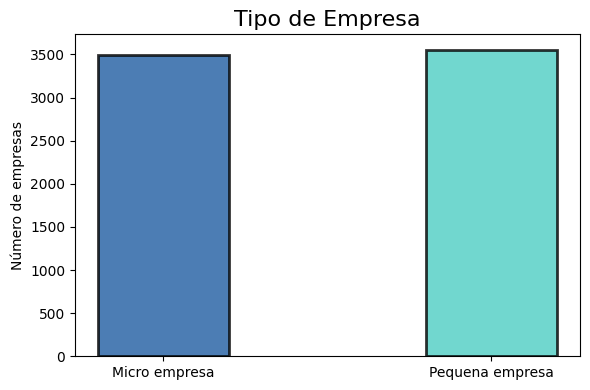

In [159]:
# Análise da coluna 'Tipo de empresa'
print("🔍 ANÁLISE DA COLUNA: TIPO DE EMPRESA")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Tipo de empresa'].value_counts()
freq_percentual = df['Tipo de empresa'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Tipo de empresa'].isnull().sum()} ({df['Tipo de empresa'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Tipo de Empresa', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.4,
        color=["#1F5CA1",'#4ECDC4'],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Na frequência exposta acima e no gráfico, nota-se que Pequenas Empresas apresentam uma taxa percentual levemente maior de 50,48% do que Micro Empresas que possui 49.52%, o que nos leva a pensar sobre o que tem motivado essa pequeno aumento visualizado, entretanto, nota-se que não á uma folga entre as mesmas, o que podemos pensar que o comportamento de churn dessas duas categorias é bem próxima, vale a pena a investigação.

Os dados estão coerentes e não possum nulos e nenhuma anormalidade.

#### Col Fundação da Empresa

🔍 ANÁLISE DA COLUNA: FUNDAÇÃO DA EMPRESA
ESTATÍSTICAS DESCRITIVAS:
count    7043.000000
mean     2016.736476
std         4.582311
min      2001.000000
25%      2016.000000
50%      2018.000000
75%      2020.000000
max      2021.000000
Name: Fundação da empresa, dtype: float64

Total de registros: 7,043
Valores nulos: 0 (0.0%)


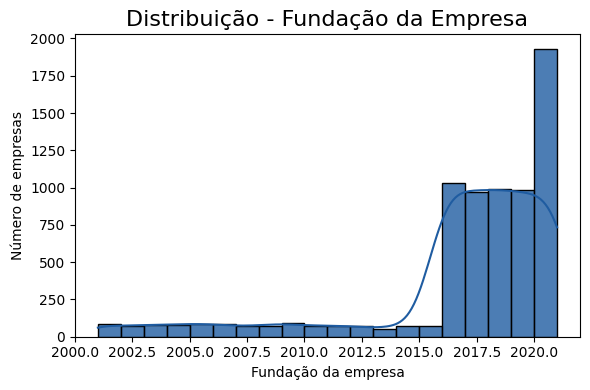

In [160]:
print("🔍 ANÁLISE DA COLUNA: FUNDAÇÃO DA EMPRESA")
print("=" * 50)

# Visualizando as estatísticas
# Neste caso como é uma variável numérica usaremos o .descibre() para obter as eststísticas que precisamos.
print("ESTATÍSTICAS DESCRITIVAS:")
stats = df['Fundação da empresa'].describe()
print(stats)

# Criando tabela com as estatísticas principais
tabela_stats = pd.DataFrame({
    'Média': [stats['mean']],
    'Mediana': [stats['50%']],
    'Mínimo': [stats['min']],
    'Máximo': [stats['max']],
    'Desvio Padrão': [stats['std']],
    'Total': [len(df)]
}, index=['Fundação da Empresa'])

print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Fundação da empresa'].isnull().sum()} ({df['Fundação da empresa'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição - Fundação da Empresa', fontsize=16)
sns.histplot(data=df,
             x='Fundação da empresa',
             kde=True,
             bins=20,
             alpha=0.8,
             color="#1F5CA1")
plt.ylabel('Número de empresas')
plt.tight_layout()

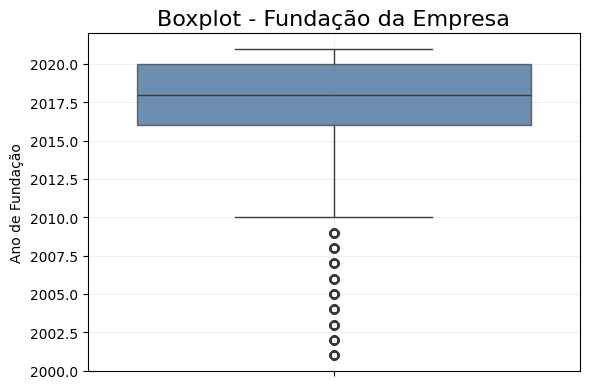

In [161]:
# Visualizando pelo boxplot

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Fundação da empresa', color="#1F5CA1", boxprops=dict(alpha=0.7))
plt.title('Boxplot - Fundação da Empresa', fontsize=16)
plt.ylabel('Ano de Fundação', fontsize=10)
plt.grid(alpha=0.2)
plt.tight_layout()

A distribuição tem uma assimetria negativa, concentrando mais os dados na parte esquerda da visualização, no histograma e no boxplot é bem nítido, pelas estatísticas descritivas acima, a mediana da fundação de empresas é no ano de 2018, enquanto a média é 2016, e o desvio padrão dos dados da média é de 4.58 anos.

Sobre os outliers que o boxplot demonstrou, definimos que são coerentes, pois, algumas empresas, de fato, foram fundadas nestes anos.

Existe uma crescente de empresas que utilizam a plataforma, porém, como estamos buscando compreender se a taxa de churn está aumentando, uma pergunta sobre essa coluna é válida: "Será que a fundação de empresa diz muito a respeito do suposto aumento de churn da plataforma?"

A distribuição não segue uma normal e os dados não contém dados nulos e se mostram consistentes.

#### Col Possui Mais de Um sócio

🔍 ANÁLISE DA COLUNA: POSSUI MAIS DE UM SÓCIO
TABELA DE FREQUÊNCIA:
                         Frequência Absoluta  Frequência Percentual (%)
Possui mais de um sócio                                                
Não                                     3641                       51.7
Sim                                     3402                       48.3

Total de registros: 7,043
Valores nulos: 0 (0.0%)


Text(0, 0.5, 'Número de empresas')

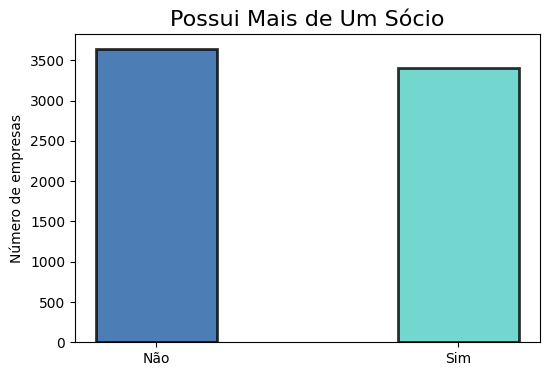

In [162]:
# Análise da coluna 'Possui mais de um sócio'
print("🔍 ANÁLISE DA COLUNA: POSSUI MAIS DE UM SÓCIO")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Possui mais de um sócio'].value_counts()
freq_percentual = df['Possui mais de um sócio'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Tipo de empresa'].isnull().sum()} ({df['Tipo de empresa'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Possui Mais de Um Sócio', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.4,
        color=["#1F5CA1",'#4ECDC4'],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')

As empresas cadastradas na plataforma revelam uma frequência superior a empresas que Não possuem mais de um sócio, equivalendo a 51,7% em comparação a 48,3% do que as que tem Mais de um sócio. A priori a plataforma está obtendo mais churn com empresas que não possuem mais de um sócio.

Os dados não apresentam nenhuma inconstância e não contém nulos.

#### Col Funcionários

🔍 ANÁLISE DA COLUNA: FUNCIONÁRIOS
TABELA DE FREQUÊNCIA:
                        Frequência Absoluta  Frequência Percentual (%)
Funcionários                                                          
6 ou mais funcionários                 2110                      29.96
até 5 funcionários                     4933                      70.04

Total de registros: 7,043
Valores nulos: 0 (0.0%)


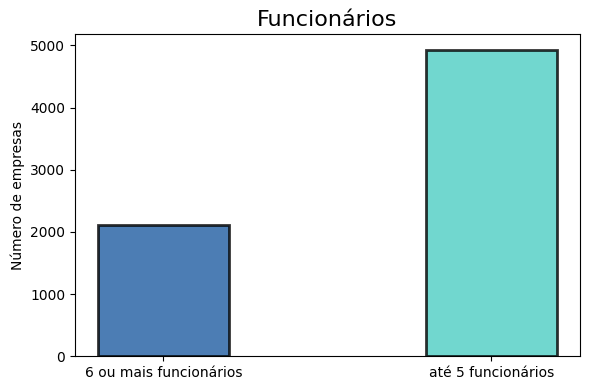

In [163]:
# Análise da coluna 'Funcionários'
print("🔍 ANÁLISE DA COLUNA: FUNCIONÁRIOS")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Funcionários'].value_counts()
freq_percentual = df['Funcionários'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Funcionários'].isnull().sum()} ({df['Funcionários'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Funcionários', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.4,
        color=["#1F5CA1",'#4ECDC4'],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Aqui vemos que a quantidade de funcionários já impacta bem mais no churn da plataforma quando em menor número de colaboradores, pela frequência acima, empresas com até 5 funcionários obtém um taxa de churn de 70,04%, enquanto, as empresas que tem 6 funcionários ou mais apresentam apenas 29,96%, uma diferença muito expressiva.

Essa variável Funcionários aparenta ser bastante significativa para o aumento de churn.

Os dados estão consistentes e não possuem valores nulos, discrepantes em sua origem.

#### Col Meses de Permanência

🔍 ANÁLISE DA COLUNA: MESES DE PERMANÊNCIA
ESTATÍSTICAS DESCRITIVAS:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Meses de permanência , dtype: float64

Total de registros: 7,043
Valores nulos: 0 (0.0%)


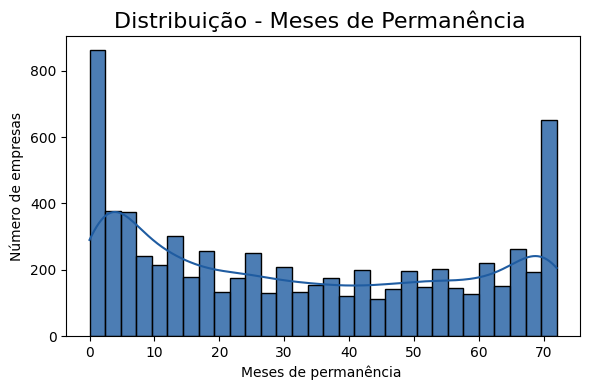

In [164]:
# Análise da coluna 'Meses de permanência'
print("🔍 ANÁLISE DA COLUNA: MESES DE PERMANÊNCIA")
print("=" * 50)

# Visualizando as estatísticas
# Neste caso como é uma variável numérica usaremos o .descibre() para obter as eststísticas que precisamos.
print("ESTATÍSTICAS DESCRITIVAS:")
stats = df['Meses de permanência '].describe()
print(stats)

# Criando tabela com as estatísticas principais
tabela_stats = pd.DataFrame({
    'Média': [stats['mean']],
    'Mediana': [stats['50%']],
    'Mínimo': [stats['min']],
    'Máximo': [stats['max']],
    'Desvio Padrão': [stats['std']],
    'Total': [len(df)]
}, index=['Meses de permanência '])

print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Meses de permanência '].isnull().sum()} ({df['Meses de permanência '].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição - Meses de Permanência ', fontsize=16)
sns.histplot(data=df,
             x= 'Meses de permanência ',
             kde=True,
             bins=30,
             alpha=0.8,
             color="#1F5CA1")
plt.ylabel('Número de empresas')
plt.tight_layout()

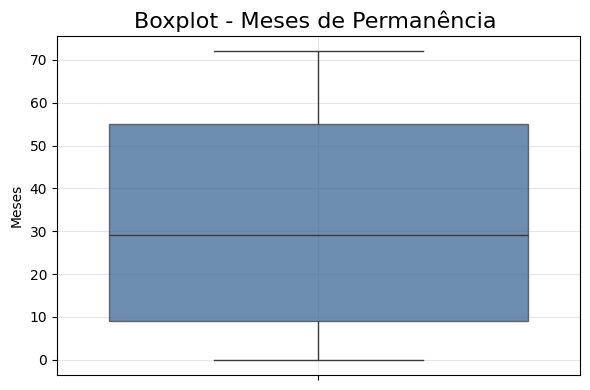

In [165]:
# Visualizando pelo boxplot

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Meses de permanência ', color="#1F5CA1", boxprops=dict(alpha=0.7))
plt.title('Boxplot - Meses de Permanência ', fontsize=16)
plt.ylabel('Meses', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

Sobre os meses de permanência temos uma média de 32 meses, que equivale á 2 anos e 8 meses de fidelidade na plataforma, isso signfica que temos clientes se fidelizando mais do que cancelando os serviços, isso se mostra pela assimetria positiva a direita dada no boxplot, onde a calda se mantém mais direcioada a direita.

A mediana é bem próxima evidenciada na visualização com 29 meses, equivalente a 2 anos e 5 meses. Enquanto o churn se mostra nos primeiros 9 meses de uso, representando 25% dos clientes que estão efetuando o cancelamento, a tendência de fidelização representa 75% dos dados.

O ponto de atenção seria exatamente para esses primeiros 9 meses de uso, a questão apropriada seria a investigação do porque o churn está ocorrendo nesses primeiros meses.

Os dados não apresentam irregularidades ou outliers e não temos dadaos nulos nessa coluna, portanto, os dados são consistentes.

#### Col Utiliza Serviços Financeiros

🔍 ANÁLISE DA COLUNA: Utiliza serviços financeiros
TABELA DE FREQUÊNCIA:
                              Frequência Absoluta  Frequência Percentual (%)
Utiliza serviços financeiros                                                
Não                                           682                       9.68
Sim                                          6361                      90.32

Total de registros: 7,043
Valores nulos: 0 (0.0%)


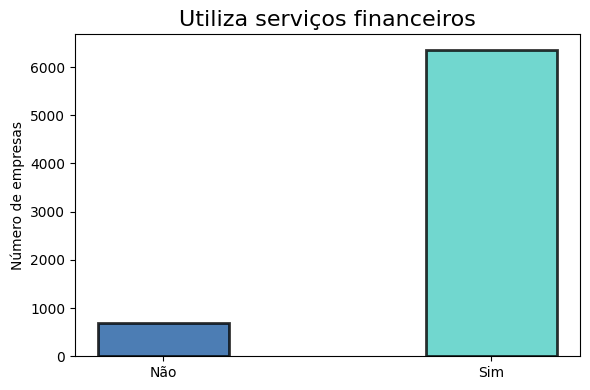

In [166]:
# Análise da coluna 'Utiliza serviços financeiros'
print("🔍 ANÁLISE DA COLUNA: Utiliza serviços financeiros")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Utiliza serviços financeiros'].value_counts()
freq_percentual = df['Utiliza serviços financeiros'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Utiliza serviços financeiros'].isnull().sum()} ({df['Utiliza serviços financeiros'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Utiliza serviços financeiros', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.4,
        color=["#1F5CA1",'#4ECDC4'],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Claramente observamos tanto visualmente tanto pela frequência que mais de 90% dos assinantes utilizam os serviços financeiros da plataforma, enquanto apenas 9,68%, não utilizam, isso significa que a taxa de churn dos serviços financeiros, tem a priori uma baixa relevância. 

Os dados são consistentes e não obtém nulos ou valores discrepantes presentes.

#### Col Possui Contador

🔍 ANÁLISE DA COLUNA: POSSUI CONTADOR
TABELA DE FREQUÊNCIA:
                Frequência Absoluta  Frequência Percentual (%)
PossuiContador                                                
Não                            3390                      48.13
Sim                            2971                      42.18
NaN                             682                       9.68

Total de registros: 7,043
Valores nulos: 682 (9.7%)


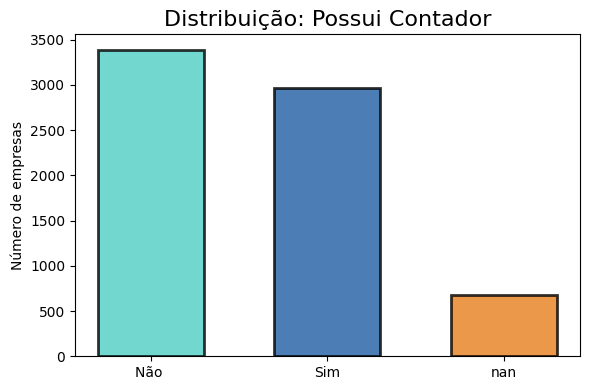

In [167]:
# Análise da coluna 'PossuiContador'
print("🔍 ANÁLISE DA COLUNA: POSSUI CONTADOR")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['PossuiContador'].value_counts(dropna=False)
freq_percentual = df['PossuiContador'].value_counts(normalize=True, dropna=False) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['PossuiContador'].isnull().sum()} ({df['PossuiContador'].isnull().mean()*100:.1f}%)")

# Gráfico
plt.figure(figsize=(6, 4))
plt.title('Distribuição: Possui Contador', fontsize=16)

plt.bar(
    tabela_frequencia.index.astype(str).tolist(),
    tabela_frequencia['Frequência Absoluta'],
    width=0.6,
    color=['#4ECDC4', '#1F5CA1', '#E77F1E'],
    alpha=0.8,
    edgecolor='black',
    linewidth=2)

plt.ylabel('Número de empresas')
plt.tight_layout()
plt.show()

De acordo com as frequências e visualização mostradas, o percentual de assinantes que **não possuem contador** mostra-se superior as demais com **48,13%** contra 46,71% que possuem, isso demonstra uma preocupação a respeito dessa variável com o churn na plataforma.

observamos que temos 9,7% de dados nulos nessa categoria, por questão de relevância decidimos trazer esse dados, pois, supostamente, muitos assinantes preferem "não informar" se possuem contador ou não, isso pode reforçar a ideia de que a grande chance de usuários da plataforma não terem contador possa aumentar, é um ponto preocupante que pode estar otimizando o churn neste período.

Os dados não apresentam irregularidades ou valores atípicos, portanto, são constantes.

#### Col Faz Conciliação Bancária

In [168]:
df['Faz conciliação bancária'].unique()

array(['automática', 'manual', 'não faz'], dtype=object)

🔍 ANÁLISE DA COLUNA: FAZ CONCILIAÇÃO BANCÁRIA
TABELA DE FREQUÊNCIA:
                          Frequência Absoluta  Frequência Percentual (%)
Faz conciliação bancária                                                
automática                               2421                      34.37
manual                                   3096                      43.96
não faz                                  1526                      21.67

Total de registros: 7,043
Valores nulos: 0 (0.0%)


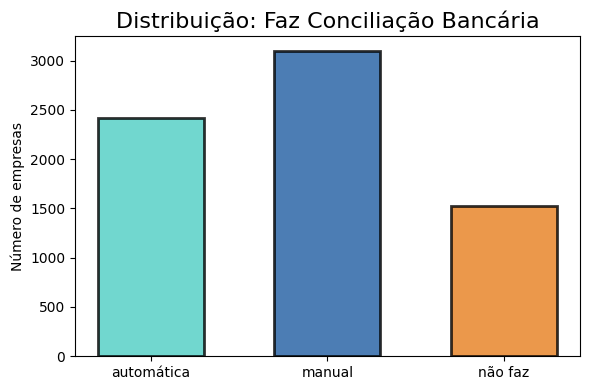

In [169]:
# Análise da coluna 'Faz conciliação bancária'
print("🔍 ANÁLISE DA COLUNA: FAZ CONCILIAÇÃO BANCÁRIA")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Faz conciliação bancária'].value_counts()
freq_percentual = df['Faz conciliação bancária'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Faz conciliação bancária'].isnull().sum()} ({df['Faz conciliação bancária'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição: Faz Conciliação Bancária', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

A plataforma contém mais assinantes que usam a conciliação bancária Manual com 43,96%, ou seja, os assinantes preferem gerenciar os assuntos de maneira mais formal, enquanto, Automática possui 34,37% que automatizam os processos financeiros e tendem a tendência de serem mais práticos.

O ponto preocupante são os assinantes que **Não fazem conciliação bancária** obtendo um total de 21,67% do total de assinantes, isso implica que essa variável tem uma grande probabilidade do churn da plataforma.

O ponto a ser levando em consideração seria: "Essa variável Conciliação Bancária, quanto que ela impacta em relação ao Churn?"

Os dados se encontram em condição estável e não há nulos presentes.

#### Col Frequência de utilização de feature do sistema: Módulo financeiro

In [170]:
df['Frequência de utilização de feature do sistema: Módulo financeiro'].unique()

array(['Pouco uso', 'Uso frequente', 'Nunca utilizou'], dtype=object)

🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Módulo Financeiro
TABELA DE FREQUÊNCIA:
                                                    Frequência Absoluta  \
Frequência de utilização de feature do sistema:...                        
Nunca utilizou                                                     1526   
Pouco uso                                                          3498   
Uso frequente                                                      2019   

                                                    Frequência Percentual (%)  
Frequência de utilização de feature do sistema:...                             
Nunca utilizou                                                          21.67  
Pouco uso                                                               49.67  
Uso frequente                                                           28.67  

Total de registros: 7,043
Valores nulos: 0 (0.0%)


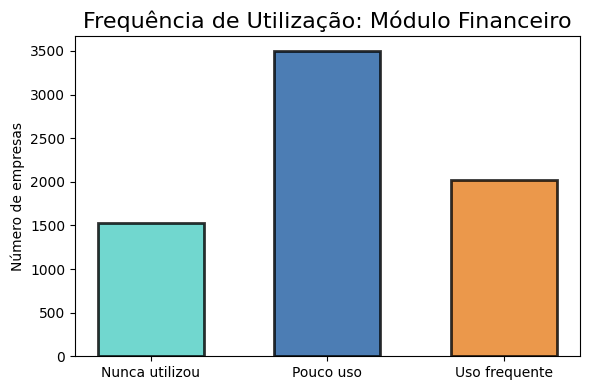

In [171]:
# Análise da coluna 'Frequência de utilização de feature do sistema: Módulo financeiro'
print("🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Módulo Financeiro")
print("=" * 90)

# Frequência Absoluta E Percentual
freq_absoluta = df['Frequência de utilização de feature do sistema: Módulo financeiro'].value_counts()
freq_percentual = df['Frequência de utilização de feature do sistema: Módulo financeiro'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Frequência de utilização de feature do sistema: Módulo financeiro'].isnull().sum()} ({df['Frequência de utilização de feature do sistema: Módulo financeiro'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Frequência de Utilização: Módulo Financeiro', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Interessante notarmos que quase 50% dos assinantes fazem **pouco uso** do módulo financeiro, portanto, os dados revelam que 49,67% corresponde ao "pouco uso", pensando em praticidade e efetividade na rotina administrativa de uma empresa, esse pode ser um fator considerado forte que pode estar relacioado a hipótese da equipe sobre o aumento de churn da plataforma. Os dados revelam também que 28,67% usam frequentemente.

Considerando que 21,67% dos assinantes relataram que nunca usaram o módulo financeiro, isso revela que a frequência contém mais o "pouco ou nunca" que utilizam, totalizando mais de 70% dos dados, enfim, é um fator preocupante.


Os dados apresentam-se bons e sem nulos.

#### Col Frequência de utilização de feature do sistema: Emissão de nota fiscal

🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Emissão de Nota Fiscal
TABELA DE FREQUÊNCIA:
                                                    Frequência Absoluta  \
Frequência de utilização de feature do sistema:...                        
Nunca utilizou                                                     1526   
Pouco uso                                                          3088   
Uso frequente                                                      2429   

                                                    Frequência Percentual (%)  
Frequência de utilização de feature do sistema:...                             
Nunca utilizou                                                          21.67  
Pouco uso                                                               43.84  
Uso frequente                                                           34.49  

Total de registros: 7,043
Valores nulos: 0 (0.0%)


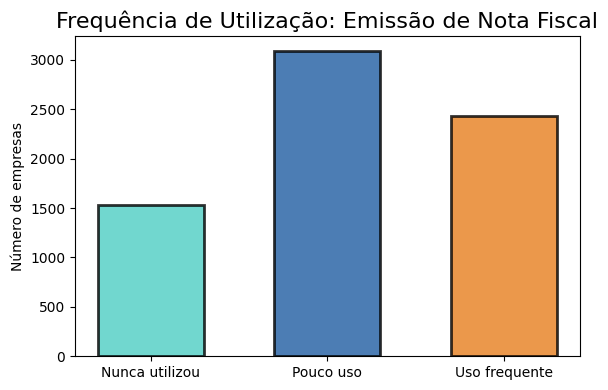

In [172]:
# Análise da coluna 'Frequência de utilização de feature do sistema: Módulo financeiro'
print("🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Emissão de Nota Fiscal")
print("=" * 90)

# Frequência Absoluta E Percentual
freq_absoluta = df['Frequência de utilização de feature do sistema: Emissão de nota fiscal'].value_counts()
freq_percentual = df['Frequência de utilização de feature do sistema: Emissão de nota fiscal'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Frequência de utilização de feature do sistema: Emissão de nota fiscal'].isnull().sum()} ({df['Frequência de utilização de feature do sistema: Emissão de nota fiscal'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Frequência de Utilização: Emissão de Nota Fiscal', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

A análise mostra que uma porcertagem considerada faz o **Uso frequente** de emissão de nota, representando 34.49% dos assinantes, enquanto **Pouco Uso** se mantém com 43.84%, isso indica que em suma, os assinantes utilizam a plataforma. Entretanto, percebe-se que existem assinantes que nunca utilizaram a emissão, ao qual representa 21.67%, portanto, esse público pode ser assinantes que não emitem nota fiscal ou são novos na plataforma, ou estão na plataforma para acompanharem alguma métrica específica e utilizam outros serviços.

Os dados não contém nulos e não observamos nenhum dados discrepante ou outilers, a condição desses dados é considerado Satisfatório.

#### Col Frequência de utilização de feature do sistema: Integração bancária

In [173]:
df['Frequência de utilização de feature do sistema: Integração bancária'].unique()

array(['Pouco uso', 'Uso frequente', 'Nunca utilizou'], dtype=object)

🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Integração bancária
TABELA DE FREQUÊNCIA:
                                                    Frequência Absoluta  \
Frequência de utilização de feature do sistema:...                        
Nunca utilizou                                                     1526   
Pouco uso                                                          3095   
Uso frequente                                                      2422   

                                                    Frequência Percentual (%)  
Frequência de utilização de feature do sistema:...                             
Nunca utilizou                                                          21.67  
Pouco uso                                                               43.94  
Uso frequente                                                           34.39  

Total de registros: 7,043
Valores nulos: 0 (0.0%)


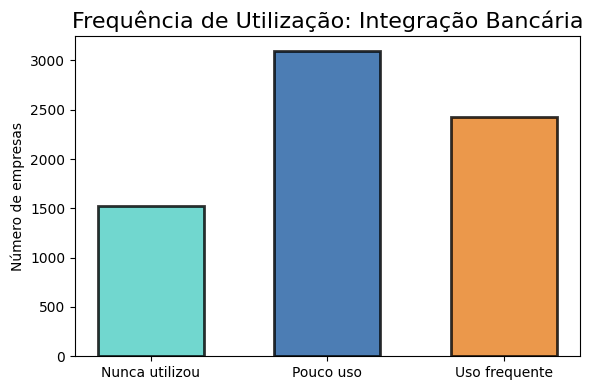

In [174]:
# Análise da coluna 'Frequência de utilização de feature do sistema: Módulo financeiro'
print("🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Integração bancária")
print("=" * 90)

# Frequência Absoluta E Percentual
freq_absoluta = df['Frequência de utilização de feature do sistema: Integração bancária'].value_counts()
freq_percentual = df['Frequência de utilização de feature do sistema: Integração bancária'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Frequência de utilização de feature do sistema: Integração bancária'].isnull().sum()} ({df['Frequência de utilização de feature do sistema: Integração bancária'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Frequência de Utilização: Integração Bancária', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

A análise mostra que uma porcertagem considerada faz o **Uso frequente** de Integração bancária, representando 34.39% dos assinantes, enquanto **Pouco Uso** se mantém com 43.94%, isso indica que em suma, os assinantes utilizam a integraçãoo na plataforma. Entretanto, percebe-se que existem assinantes que nunca utilizaram a integração, ao qual representa 21.67%, possíveis fatores associados a esse público que também é bastante considerável são: meio próprios para administração financeira, novos na plataforma.

Os dados não contém nulos e não observamos nenhum dados discrepante ou outilers, a condição desses dados é considerado Satisfatório.

#### Col Frequência de utilização de feature do sistema: Módulo de vendas

In [175]:
df['Frequência de utilização de feature do sistema: Módulo de vendas'].unique()

array(['Pouco uso', 'Uso frequente', 'Nunca utilizou'], dtype=object)

🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Módulo de Vendas
TABELA DE FREQUÊNCIA:
                                                    Frequência Absoluta  \
Frequência de utilização de feature do sistema:...                        
Nunca utilizou                                                     1526   
Pouco uso                                                          3473   
Uso frequente                                                      2044   

                                                    Frequência Percentual (%)  
Frequência de utilização de feature do sistema:...                             
Nunca utilizou                                                          21.67  
Pouco uso                                                               49.31  
Uso frequente                                                           29.02  

Total de registros: 7,043
Valores nulos: 0 (0.0%)


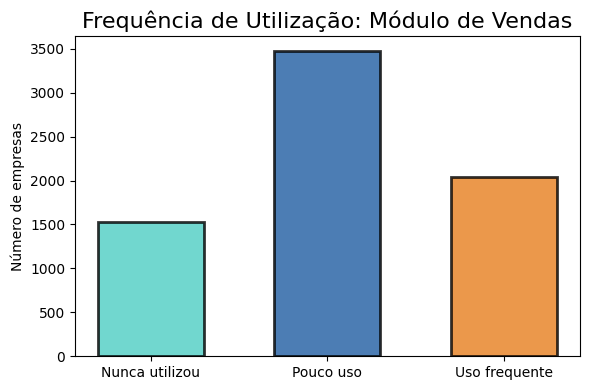

In [176]:
# Análise da coluna 'Frequência de utilização de feature do sistema: Módulo financeiro'
print("🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Módulo de Vendas")
print("=" * 90)

# Frequência Absoluta E Percentual
freq_absoluta = df['Frequência de utilização de feature do sistema: Módulo de vendas'].value_counts()
freq_percentual = df['Frequência de utilização de feature do sistema: Módulo de vendas'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Frequência de utilização de feature do sistema: Módulo de vendas'].isnull().sum()} ({df['Frequência de utilização de feature do sistema: Módulo de vendas'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Frequência de Utilização: Módulo de Vendas', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Novamente vemos a predominância do **Pouco sso** com 49,31% dos assinantes que utilizam esse função, enquanto o **Uso frequente** detém 29,02% de uso, ou seja, pelo que olhamos visualmente, supostamente muitos assinantes estão mais "testando" ou "experimentando" a função, enquanto 21,67% **nunca utilizaram**, ou seja, parece que a conversão para uso frequente não está tendo um engajamento muito efetivo, levando a pensarmos que esse "padrão" pode impactar em partes do desempenho de churn da plataforma.

Sobre os dados:
- Os dados não contém nulos e não observamos nenhum dados discrepante ou outilers, a condição desses dados é considerado Satisfatório.

#### Col Frequência de utilização de feature do sistema: Relatórios

🔍 ANÁLISE DA COLUNA: Frequência de utilização de feature do sistema: Relatórios
TABELA DE FREQUÊNCIA:
                                                    Frequência Absoluta  \
Frequência de utilização de feature do sistema:...                        
Nunca utilizou                                                     1526   
Pouco uso                                                          2810   
Uso frequente                                                      2707   

                                                    Frequência Percentual (%)  
Frequência de utilização de feature do sistema:...                             
Nunca utilizou                                                          21.67  
Pouco uso                                                               39.90  
Uso frequente                                                           38.44  

Total de registros: 7,043
Valores nulos: 0 (0.0%)


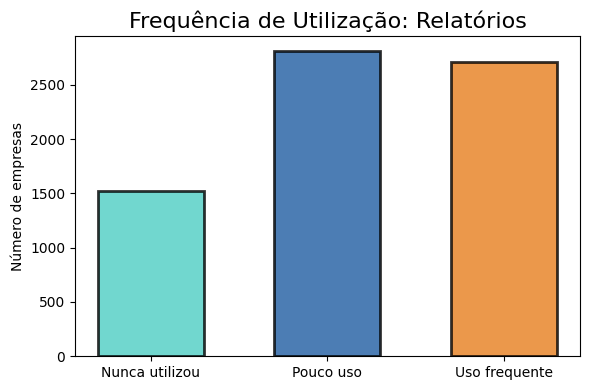

In [177]:
print("🔍 ANÁLISE DA COLUNA: Frequência de utilização de feature do sistema: Relatórios")
print("=" * 90)

# Frequência Absoluta E Percentual
freq_absoluta = df['Frequência de utilização de feature do sistema: Relatórios'].value_counts()
freq_percentual = df['Frequência de utilização de feature do sistema: Relatórios'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Frequência de utilização de feature do sistema: Relatórios'].isnull().sum()} ({df['Frequência de utilização de feature do sistema: Relatórios'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Frequência de Utilização: Relatórios', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Nesta análise, descobrimos que o **Uso frequente** se faz bem mais presente dentre as frequências acima com o percentual de 38.44% dos assinantes, isso mostra a priori, uma boa aceitação dessa função na plataforma, totalizando com **Pouco uso** a plataforma contém 78,34% dos assinantes que utilizam essa função. No entanto **Nunca utilizou** mantém os mesmos 21.67% isso é no fato curioso, pois, se mantém pela terceira vez com essa porcentagem, os fatos dessa porcentagem podem ser semelhantes a novos assinantes e simplesmente muito detém os seus próprios serviços para tal.

Sobre os dados:
- Os dados não contém nulos e não observamos nenhum dados discrepante ou outilers, a condição desses dados é considerado Satisfatório.

#### Col Frequência de utilização de feature do sistema: Utilização de APIs de integração

🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Utilização de APIs de Integração
TABELA DE FREQUÊNCIA:
                                                    Frequência Absoluta  \
Frequência de utilização de feature do sistema:...                        
Nunca utilizou                                                     1526   
Pouco uso                                                          2785   
Uso frequente                                                      2732   

                                                    Frequência Percentual (%)  
Frequência de utilização de feature do sistema:...                             
Nunca utilizou                                                          21.67  
Pouco uso                                                               39.54  
Uso frequente                                                           38.79  

Total de registros: 7,043
Valores nulos: 0 (0.0%)


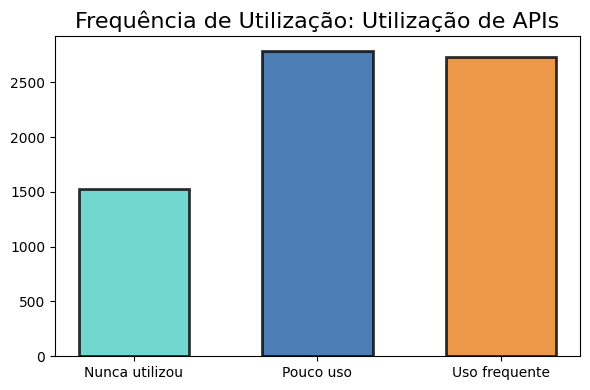

In [178]:
print("🔍 ANÁLISE DA COLUNA: Frequência de Utilização de Feature do Sistema: Utilização de APIs de Integração")
print("=" * 90)

# Frequência Absoluta E Percentual
freq_absoluta = df['Frequência de utilização de feature do sistema: Utilização de APIs de integração'].value_counts()
freq_percentual = df['Frequência de utilização de feature do sistema: Utilização de APIs de integração'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Frequência de utilização de feature do sistema: Utilização de APIs de integração'].isnull().sum()} ({df['Frequência de utilização de feature do sistema: Utilização de APIs de integração'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Frequência de Utilização: Utilização de APIs', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.tight_layout()

Nesta análise, descobrimos que o **Uso frequente** se faz bem mais presente dentre as frequências acima que analisamos com o percentual um pouco maior, representando 38.79% dos assinantes, isso demonstra também um uso positivo dessa função na plataforma, totalizando com **Pouco uso** a plataforma contém 78,33% dos assinantes que utilizam essa função. No entanto **Nunca utilizou** mantém os mesmos 21.67%, os fatos dessa porcentagem também permanecer a mesma, indicando fatores de não uso de fato, ou, outros tipos de serviços.

Sobre os dados:
- Os dados não contém nulos e não observamos nenhum dados discrepante ou outilers, a condição desses dados é considerado Satisfatório.

#### Col Contrato

🔍 ANÁLISE DA COLUNA: Contrato
TABELA DE FREQUÊNCIA:
            Frequência Absoluta  Frequência Percentual (%)
Contrato                                                  
Anual                      1695                      24.07
Mês-a-mês                  3875                      55.02
Trimestral                 1473                      20.91

Total de registros: 7,043
Valores nulos: 0 (0.0%)


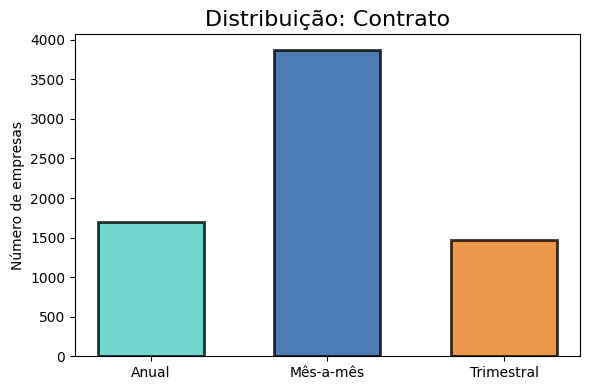

In [179]:
print("🔍 ANÁLISE DA COLUNA: Contrato")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Contrato'].value_counts()
freq_percentual = df['Contrato'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Contrato'].isnull().sum()} ({df['Contrato'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição: Contrato', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.6,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Nota-se que mais da metade das empresas com assinaturas na plataforma preferem ter um **contrato mensal**, representando **55,02%**, claramente esse é um padrão evidente, pois, mais da metade prefere desta forma, totalizando **3875** empresas que utilizam essa opção de assinatura. Já o plano Anual contém 1965 empresas que representam 24,07% e o Trimestral contém 1473 empresas que detém 20,91%.

Podemos observar que por mais que a preferência seja mensal com mais de metade das empresas, ainda sim, o risco de churn torna-se mais propício a acontecer, por conta da rotatividade que pode haver e até migrações se for assim da vontade das empresas. Neste caso o planejamento de uma estratégia seria o ideal para uma retenção mais **segura** para a plataforma.

Sobre os dados, não encontramos nenhum valor discrepante e nem nulos, então, os dados estão em conformidade e podem ser usado para fins de aprofundamento em análises e modelos.

#### Col Emite boletos

In [180]:
df['Emite boletos'].unique()

array([1, 0])

Notamos que ambas as colunas "Emite Boletos" e "Emite Boletos.1" em suma ambas imprimem um resultado que tem a mesma finalidade para esta análise, porém, em termos mais técnicos elas podem ter uma importância diferente por conta do seu tipo.

Exemplo de uso de ambas neste conjunto de dados:
- Emite Boletos → versão numérica (0/1). Ideal também para algoritmos, filtros lógicos e cálculos.
- Emite Boletos.1 → versão textual (“Sim”/“Não”). Pode ser usado também para visualizações, relatórios e comunicação com áreas de negócio.

Observação:
- neste caso usamos a coluna "Emite Boletos" e uma transformação foi realizada para observamos com ainda mais clareza.

ANÁLISE DA COLUNA: Emite Boletos
TABELA DE FREQUÊNCIA:
               Frequência Absoluta  Frequência Percentual (%)
Emite boletos                                                
0                             2872                      40.78
1                             4171                      59.22

Total de registros: 7,043
Valores nulos: 0 (0.0%)


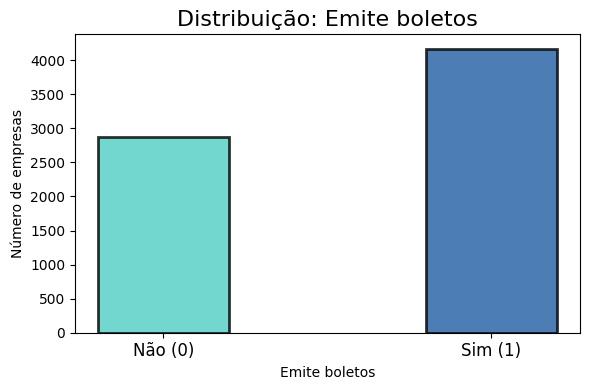

In [181]:
print("ANÁLISE DA COLUNA: Emite Boletos")
print("=" * 50)

# Frequência Absoluta e Percentual
freq_absoluta = df['Emite boletos'].value_counts()
freq_percentual = df['Emite boletos'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Emite boletos'].isnull().sum()} ({df['Emite boletos'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição: Emite boletos', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.4,
        color=['#4ECDC4', '#1F5CA1'],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)

# Aplicando a transformação necessária:
plt.xticks([0, 1], ['Não (0)', 'Sim (1)'], fontsize=12)
# plt.xticks([0, 1], ['0', '1'])  ← versão mais simples

plt.ylabel('Número de empresas')
plt.xlabel('Emite boletos')
plt.tight_layout()
plt.show()

Na plataforma 4171 assinantes (empresas) **emitem boletos** *Sim(1)*, isso representa **59,22%** quase 60% dos dados, isso sinaliza que muitas empresas fazem uso dessa função.

Nos atentamos ao valor de 40,78% *Não(0)* que não emitem, levando em consideração é um número bem expressivo o que pode levar a uma pesquisa para saber o perfil dessas empresas, exemplo: se a segmentação atuante das empresas a emissão de boletos é relevante, essa variável requer uma atenção posterior de checagem do impacto com a variável churn para medirmos o impacto.

Sobre os dados, não encontramos nenhum valor discrepante e nem nulos, então, os dados estão em conformidade e podem ser usado para fins de aprofundamento em análises e modelos.

#### Col Tipo de pagamento

In [182]:
df['Tipo de pagamento'].unique()

array(['Boleto - pagamento único', 'Boleto - mês a mês',
       'Cartão de crédito - pagamento único',
       'Cartão de crédito - mês a mês'], dtype=object)

🔍 ANÁLISE DA COLUNA: Tipo de pagamento
TABELA DE FREQUÊNCIA:
                                     Frequência Absoluta  \
Tipo de pagamento                                          
Boleto - mês a mês                                  1612   
Boleto - pagamento único                            2365   
Cartão de crédito - mês a mês                       1522   
Cartão de crédito - pagamento único                 1544   

                                     Frequência Percentual (%)  
Tipo de pagamento                                               
Boleto - mês a mês                                       22.89  
Boleto - pagamento único                                 33.58  
Cartão de crédito - mês a mês                            21.61  
Cartão de crédito - pagamento único                      21.92  

Total de registros: 7,043
Valores nulos: 0 (0.0%)


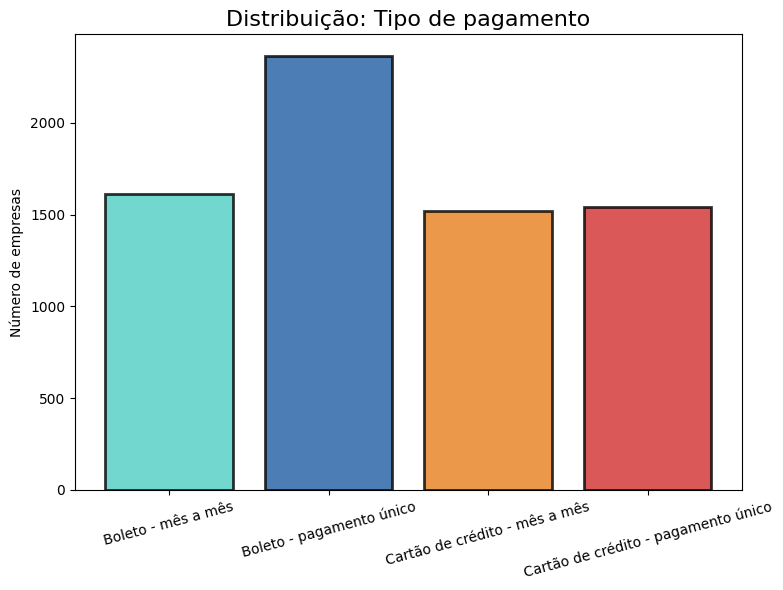

In [183]:
print("🔍 ANÁLISE DA COLUNA: Tipo de pagamento")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Tipo de pagamento'].value_counts()
freq_percentual = df['Tipo de pagamento'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Tipo de pagamento'].isnull().sum()} ({df['Tipo de pagamento'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(8, 6))
plt.title('Distribuição: Tipo de pagamento', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.8,
        color=['#4ECDC4', '#1F5CA1', "#E77F1E", "#D12E2E"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()

A proposta dessa visualização e frequências obtidas são revelar o método(tipo) de pagamento mais usado pelas empresas assinandas na plataforma, com isso, temos em ordem prioritária:

* Boleto – pagamento único: 2.365 empresas, percentual (33,6%)
* Boleto – mês a mês: 1.612 empresas, percentual (22,9%)
* Cartão de crédito – pagamento único: 1.544 empresas, percentual (21,9%)
* Cartão de crédito – mês a mês: 1.522 empresas, percentual (21,6%)

De maneira clara podemos perceber que não existe um desbalanceamento grande entre os métodos de pagamento por Boleto e Cartão de Crédito, de fato os pagamentos por boleto se sobressaem na plataforma, principalmenete o **pagamento único** isso nos dá o entendimento que 33,6% das empresas da plataforma preferem quitar de uma única vez o acesso.

Podemos também ver que temos uma diversificação financeira das empresas assinantes.

Sobre os dados:
- Não foram encontrados valores Nulos e a distribuição é coerente, não foram encontrados nenhum dado incomum, então, esses dados são recomendados para análises mais aprofundadas.


#### Col Receita mensal

🔍 ANÁLISE DA COLUNA: Receita Mensal
ESTATÍSTICAS DESCRITIVAS:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Receita mensal, dtype: float64

Total de registros: 7,043
Valores nulos: 0 (0.0%)


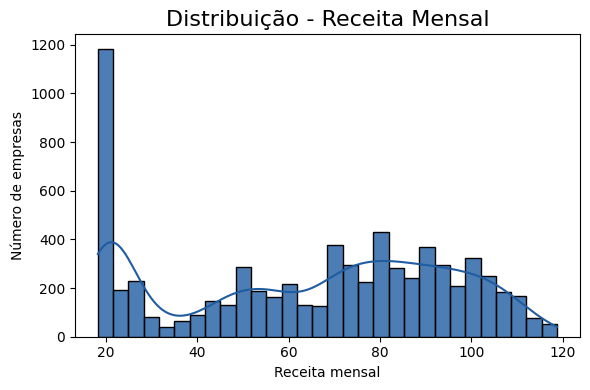

In [184]:
print("🔍 ANÁLISE DA COLUNA: Receita Mensal")
print("=" * 50)

# Visualizando as estatísticas
# Neste caso como é uma variável numérica usaremos o .descibre() para obter as eststísticas que precisamos.
print("ESTATÍSTICAS DESCRITIVAS:")
stats = df['Receita mensal'].describe()
print(stats)

# Criando tabela com as estatísticas principais
tabela_stats = pd.DataFrame({
    'Média': [stats['mean']],
    'Mediana': [stats['50%']],
    'Mínimo': [stats['min']],
    'Máximo': [stats['max']],
    'Desvio Padrão': [stats['std']],
    'Total': [len(df)]
}, index=['Fundação da Empresa'])

print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Receita mensal'].isnull().sum()} ({df['Receita mensal'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição - Receita Mensal', fontsize=16)
sns.histplot(data=df,
             x='Receita mensal',
             kde=True,
             bins=30,
             alpha=0.8,
             color="#1F5CA1")
plt.ylabel('Número de empresas')
plt.tight_layout()

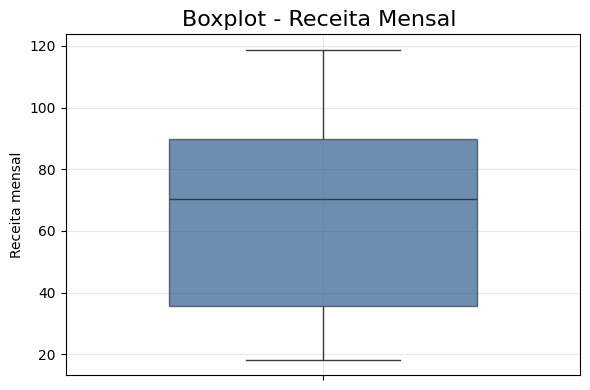

In [185]:
# Visualizando pelo boxplot

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Receita mensal', width=0.6, color="#1F5CA1", boxprops=dict(alpha=0.7))
plt.title('Boxplot - Receita Mensal ', fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()

Sobre a Receita Mensal temos as seguintes estátisticas que deixamos em (R$) para tonar mais compreensível a informação:

* Média: R$ 64,76
* Mediana: R$ 70,35
* Desvio padrão: R$ 30,09
* Mínimo: R$ 18,25
* Máximo: R$ 118,75

A média de receita mensal das empresas na plataforma é de R$ 64,76, com valor mínimo de R$ 18,25 e máximo de R$ 118,75.

A distribuição apresenta assimetria negativa, como evidenciado pelo boxplot: a mediana (R$ 70,35) é maior que a média (R$ 64,76) e está deslocada para a direita dentro da caixa, com a cauda mais longa à esquerda. Isso indica que há uma quantidade maior de empresas com receitas mais baixas e uma proporção menor de empresas com receitas mais altas, embora o pico de frequência também esteja concentrado nos valores menores.

Sobre os dados, não foram encontrados nulos e apresentam boas condições para análises ainda mais técnicas.

#### Col Receita total

🔍 ANÁLISE DA COLUNA: Receita Total
ESTATÍSTICAS DESCRITIVAS:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Receita total, dtype: float64

Total de registros: 7,043
Valores nulos: 11 (0.2%)


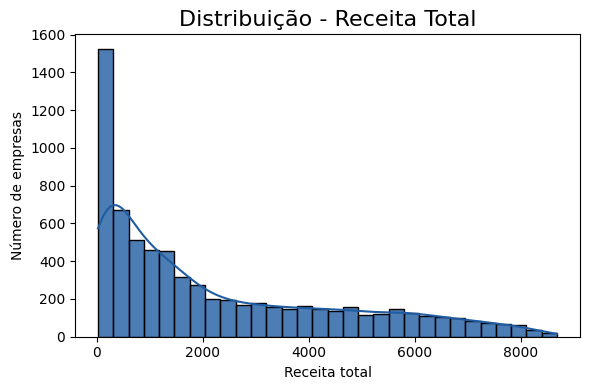

In [186]:
print("🔍 ANÁLISE DA COLUNA: Receita Total")
print("=" * 50)

# Visualizando as estatísticas
# Neste caso como é uma variável numérica usaremos o .descibre() para obter as eststísticas que precisamos.
print("ESTATÍSTICAS DESCRITIVAS:")
stats = df['Receita total'].describe()
print(stats)

# Criando tabela com as estatísticas principais
tabela_stats = pd.DataFrame({
    'Média': [stats['mean']],
    'Mediana': [stats['50%']],
    'Mínimo': [stats['min']],
    'Máximo': [stats['max']],
    'Desvio Padrão': [stats['std']],
    'Total': [len(df)]
}, index=['Fundação da Empresa'])

print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Receita total'].isnull().sum()} ({df['Receita total'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição - Receita Total', fontsize=16)
sns.histplot(data=df,
             x='Receita total',
             kde=True,
             bins=30,
             alpha=0.8,
             color="#1F5CA1")
plt.ylabel('Número de empresas')
plt.tight_layout()

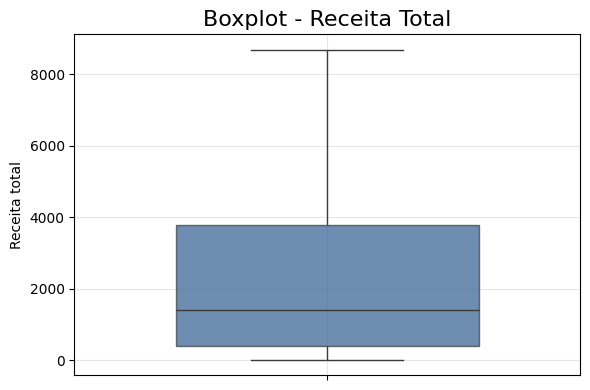

In [187]:
# Visualizando pelo boxplot

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Receita total', width=0.6, color="#1F5CA1", boxprops=dict(alpha=0.7))
plt.title('Boxplot - Receita Total', fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()

Desta vez vimos que possuímos 11 nulos que equivalem a (0,2%) dos dados, uma quantia muito baixa e pensando em como os dados apresentam uma boa estabilidade e constância sem ouliers expressivos e nulos, portanto, podemos considerar que possivelmente essa quantia baixa de dados nulos seja por conta de empresas recentes, ou, se são empresas que nem chegaram a ficar o período ao qual esse dado é pontuado na plataforma.

Sobre a Receita Total temos as seguintes estátisticas que deixamos em (R$) para melhor compreensão:

* Média: R$ 2.283,30
* Mediana: R$ 1.397,48
* Desvio padrão: R$ 2.266,77
* Mínimo: R$ 18,80
* Máximo: R$ 8.684,80

A distribuição apresenta uma evidente assimetria positiva, como evidenciado pelo boxplot e no histograma: a mediana 2º quartil(50%) é: R$ 1397,37, é menor do que a média R$ 2.283,30 e está deslocada para a esquerda dentro da caixa, com a cauda mais longa à direita. Isso indica que há uma quantidade maior de empresas com receita total mais baixa e uma proporção menor de empresas com receitas mais altas, essas empresas com receitas totais altas, podem ser empresas fiéis a plataforma e clientes de fato com receita elevada.

Não foram encontrados mais anomalias nos dados e os nulos não representam algo preocupante neste contexto, então, os dados estão prontos e são considerados importantes para serem analisados com o *churn*.

#### Col Churn

In [188]:
df['Churn'].unique()

array(['Não', 'Sim'], dtype=object)

🔍 ANÁLISE DA COLUNA: Churn
TABELA DE FREQUÊNCIA:
       Frequência Absoluta  Frequência Percentual (%)
Churn                                                
Não                   5174                      73.46
Sim                   1869                      26.54

Total de registros: 7,043
Valores nulos: 0 (0.0%)


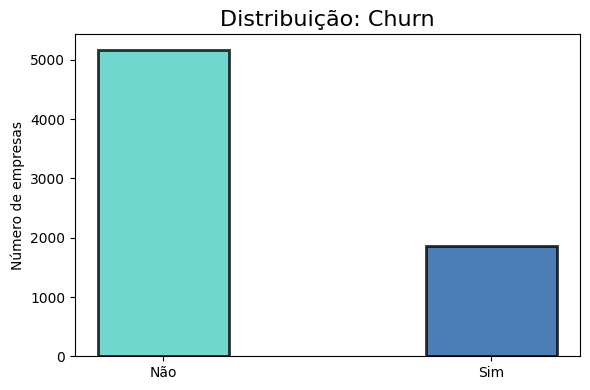

In [189]:
print("🔍 ANÁLISE DA COLUNA: Churn")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['Churn'].value_counts()
freq_percentual = df['Churn'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['Churn'].isnull().sum()} ({df['Churn'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição: Churn', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.4,
        color=['#4ECDC4', '#1F5CA1'],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

Analisando essa distribuição temos **5174** empresas que correspondem á (**73,46%**) que *não* deram churn na plataforma, portanto, temos mais de 70% das empresas operantes na plataforma, entretanto, nota-se que **1869** empresas que representam (**26,54%**) cancelaram(*sim*) os nossos serviços, que de fato, é um número expressivo e alarmante que requer um entendimento desses mais de 26%.

Os dados se encontram estáveis sem nulos e anomalias, sendo considerados relevantes para análises mais aprofundadas.

#### Col mes_churn

In [190]:
df['mes_churn'].unique()

array([nan, '04/2025', '05/2025'], dtype=object)

🔍 ANÁLISE DA COLUNA: mes_churn
TABELA DE FREQUÊNCIA:
           Frequência Absoluta  Frequência Percentual (%)
mes_churn                                                
04/2025                    911                      48.74
05/2025                    958                      51.26

Total de registros: 7,043
Valores nulos: 5174 (73.5%)


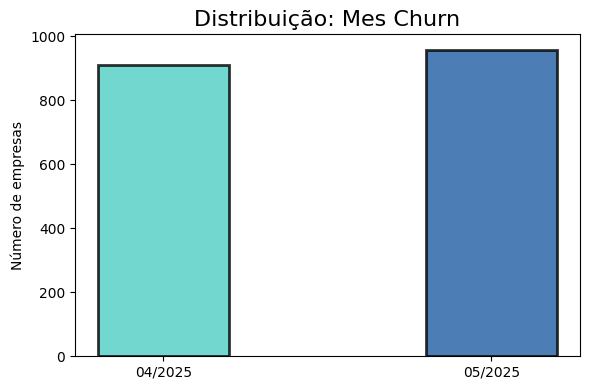

In [191]:
print("🔍 ANÁLISE DA COLUNA: mes_churn")
print("=" * 50)

# Frequência Absoluta E Percentual
freq_absoluta = df['mes_churn'].value_counts()
freq_percentual = df['mes_churn'].value_counts(normalize=True) * 100

# Criando DataFrame com resultados
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Percentual (%)': freq_percentual.round(2)
}).sort_index()

print("TABELA DE FREQUÊNCIA:")
print(tabela_frequencia)
print(f"\nTotal de registros: {len(df):,}")
print(f"Valores nulos: {df['mes_churn'].isnull().sum()} ({df['mes_churn'].isnull().mean()*100:.1f}%)")

# Visualização
plt.figure(figsize=(6, 4))
plt.title('Distribuição: Mes Churn', fontsize=16)
plt.bar(tabela_frequencia.index,
        tabela_frequencia['Frequência Absoluta'],
        width=0.4,
        color=['#4ECDC4', '#1F5CA1', "#D36C17"],
        alpha=0.8, 
        edgecolor='black', 
        linewidth=2)
plt.ylabel('Número de empresas')
plt.tight_layout()

A Distribuição revela os dois meses do ano de 2025 que são Abril(04) e Maio(05), ambos foram separados para essa análise.

Observamos que temos uma frequência de nulos que representam 73,5% de empresas que estão ativas na plataforma, totalizando 5.174 empresas ativas.

A distribuição real é:
* Valores Nulos (clientes ativos): 5.174 empresas (73,5%)
* 05/2025: 958 empresas (13,6%)
* 04/2025: 911 empresas (12,9%)

Pela distribuição, observa-se que Maio se sobressai com uma pequena diferença de churn em relação a Abril, portanto, de fato, algo gerou esse leve aumento e requer uma investigação para compreensão do aumento.

Os dados são consistentes, e não apresentam nenhum valor atípico, então concluímos que o mesmo está pronto para análises posteriores.

### Análise Exploratória Multivariada e Teste de Hipótese

Nesta etapa, vamos entender como a coluna(variável) **Churn** do conjunto de dados se comporta em relação a algumas variáveis selecionadas. O objetivo desta etapa é compreender se alguma das variáveis que selecionamos realmente tem relevância com o aumento de churn na plataforma.

Em seguida iremos realizar **Testes de Hipótese** para comprovar se as nossas descobertas são estatísticamente significativas para comprovação.

Vamos lá !

#### Funcionários vs Churn

ANÁLISE: FUNCIONÁRIOS vs CHURN
Churn                     Não    Sim
Funcionários                        
até 5 funcionários      68.72  31.28
6 ou mais funcionários  84.55  15.45


<Figure size 800x600 with 0 Axes>

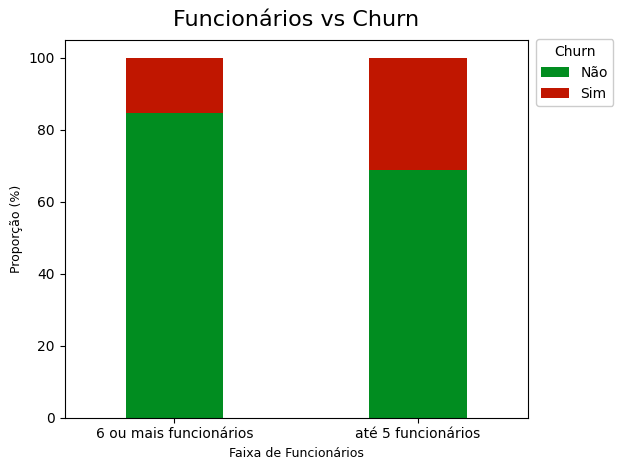

In [192]:
print(f"ANÁLISE: FUNCIONÁRIOS vs CHURN")
print("=" * 70)

# Frequência por grupo
crosstab_prop = pd.crosstab(df['Funcionários'], df['Churn'], normalize='index') * 100
crosstab_prop = crosstab_prop.round(2)
print(crosstab_prop.sort_values('Sim', ascending=False))

# Visualização
plt.figure(figsize=(8, 6))
crosstab_prop.sort_values('Sim').plot(kind='bar', stacked=True, color=["#018d20", "#C01600"], width=0.4)
plt.title('Funcionários vs Churn', fontsize=16, pad=10)
plt.xlabel('Faixa de Funcionários', fontsize= 9)
plt.ylabel('Proporção (%)', fontsize= 9)
plt.legend(title='Churn',
           labels=['Não', 'Sim'],
           loc='upper right',       
           bbox_to_anchor=(1.2, 1.02),
           fancybox=True, 
           shadow=False, 
           framealpha=1)
plt.xticks(rotation=0.01)
plt.tight_layout()

De acordo com a visualização e distribuição, empresas com até **5 funcionários tem uma chance maior de churn, representando 31.28%**, do que as empresas com 6 funcionários ou mais.

Uma revisão nas operações dessas empresas com maior risco de churn é valida, e se necessário, afim de otimizar a produção como um todo a idéia de ter mais funcionários, se torna mais viável para a fidelização de empressas assinantes na plataforma.

A seguir, iremos realizar um teste de hipótese para avaliar se esse resultado é estatísticamente significativo.

##### Teste utilizado: **Teste Z para duas proporções independentes**

O Teste Z para duas proporções independentes é apropriado neste contexto, pois permite avaliar se a diferença observada entre as proporções de churn dos dois grupos é estatisticamente significativa. O teste baseia-se na aproximação normal das proporções amostrais, válida quando os tamanhos das amostras são suficientemente grandes.

Como os tamanhos amostrais são superiores a 30 observações em cada grupo, o Teorema do Limite Central pode ser aplicado, garantindo que a distribuição da proporção amostral seja aproximadamente normal, mesmo que a variável original seja binária.

O nível de significância adotado para o teste é 0.05(95%).

- H0 = A proporção de churn para ambos os grupos de funcionários são iguais.
- HA = A proporção de churn com empresas que possuem até 5 funcionários é superior.

In [193]:
# Transformação da variável Churn para o tipo binário(bool) para que conseguimos usar o Teste Z para comparação de duas proporções
# Sim representando '1'
# Não representando '0'

df['Churn_bin'] = df['Churn'].map({'Sim': 1, 'Não': 0})

In [194]:
# Divindo as duas catergorias em duas amostras independentes para realizar o teste

df_churn_func_6mais = df[df['Funcionários'] == '6 ou mais funcionários']

df_churn_func_5 = df[df['Funcionários'] == 'até 5 funcionários']

In [195]:
from statsmodels.stats.proportion import proportions_ztest

# Teste
successes = [df_churn_func_5['Churn_bin'].sum(), df_churn_func_6mais['Churn_bin'].sum()]
nobs = [len(df_churn_func_5), len(df_churn_func_6mais)]

z_stat, p_value = proportions_ztest(successes, nobs=nobs, alternative='larger') # alternative: define também um teste unilateral (one-tailed) à direita.
print(f'Teste Z: {z_stat:.4f}\nP-value: {p_value}')

Teste Z: 13.7819
P-value: 1.6380414046988424e-43


In [196]:
# 1. Calculando as taxas (Proporções)
taxa_churn_sim = (successes[0] / nobs[0]) * 100
taxa_churn_nao = (successes[1] / nobs[1]) * 100

# 2. Calculando a diferença absoluta
diff_absoluta = taxa_churn_sim - taxa_churn_nao

print(f"Taxa de Churn (5 Funcionários): {taxa_churn_sim:.2f}%")
print(f"Taxa de Churn (6+ Funcionários): {taxa_churn_nao:.2f}%")
print("-" * 40)
print(f"Diferença absoluta: {diff_absoluta:.2f} pontos percentuais")

Taxa de Churn (5 Funcionários): 31.28%
Taxa de Churn (6+ Funcionários): 15.45%
----------------------------------------
Diferença absoluta: 15.83 pontos percentuais


Dado o resultado, o p-valor (1.638e-43) é muito abaixo do nível de confiaça de 0.05(95%), portanto, a hipótese nula é rejeitada e podemos afirmar com 95% de confiança que de fato, a proporção de churn para o grupo de empresas que possuem **até 5 funcionários** representado por **31.28%** é estatítiscamente significativo e a diferença percentural entre os grupos é de **15.83%**.

#### Fundação da Empresa vs Churn

ANÁLISE: FUNDAÇÃO DA EMPRESA vs CHURN
        count         mean       std     min     25%     50%     75%     max
Churn                                                                       
Não    5174.0  2017.127174  4.156245  2001.0  2016.0  2018.0  2020.0  2021.0
Sim    1869.0  2015.654896  5.452167  2001.0  2015.0  2017.0  2019.0  2021.0


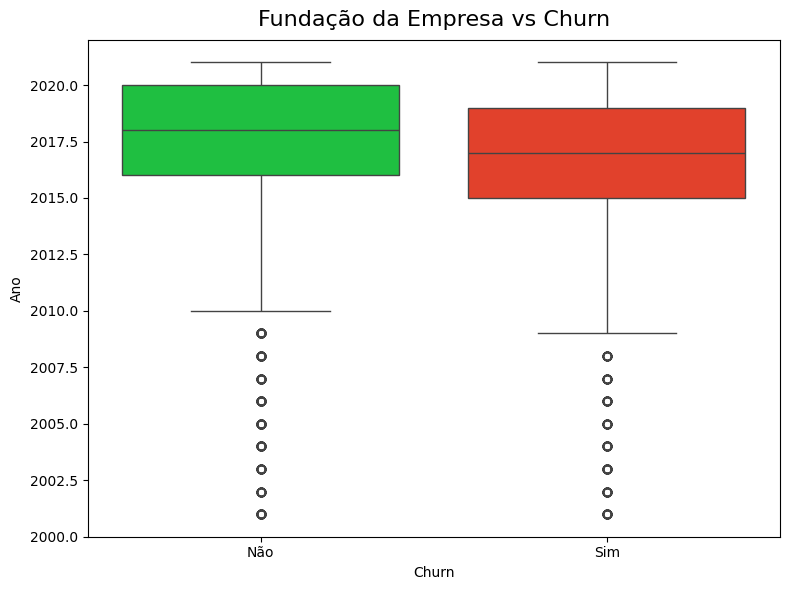

In [197]:
print(f"ANÁLISE: FUNDAÇÃO DA EMPRESA vs CHURN")
print("=" * 70)

# Estatísticas de resumo por grupo
grouped = df.groupby('Churn')['Fundação da empresa'].describe()
print(grouped)

# Visualização
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Fundação da empresa', data=df, hue='Churn', palette=["#04da32", "#ff2a0e"], legend=False)
plt.title('Fundação da Empresa vs Churn', fontsize= 16, pad= 10)
plt.xlabel('Churn')
plt.ylabel('Ano')
plt.tight_layout()
plt.show()

Na análise da *Fundação da Empresa* com *Churn* é notável pelas estátisticas descritivas que as empresas que são mais antigas tem mais chances de churn na plataforma, isso se da pelo fato da média, 1 quartil(25%), mediana 2 quartil(50%), 3 quartil(75%) terem anos de fundação mais antigos.

No boxplot acima fica nítida a diferença que empresas mais antigas tem a propensão de ter mais churn. A assimetria é negativa, pois, a média é menor do que a mediana.

Para validarmos se essa descoberta de **empresas mais antigas apresentarem maior churn** é estatísticamente siginificativa, iremos realizar um teste de hipótese.

Para a escolha do teste que iremos realizar, vamos verificar se as variâncias assumem uma igualdade entre elas, isso é fundamental para a definição do tipo de teste T que usaremos, se a igualdade for assumida, então realizaremos o Teste T-Student para duas amostras independentes, senão assumir variâncias iguais, iremos realizar o Teste T Welch que é semelhante.

Como os tamanhos amostrais são superiores a 30 observações em cada grupo, o Teorema do Limite Central pode ser aplicado, garantindo que a distribuição da proporção amostral seja aproximadamente normal.

In [198]:
df.groupby('Churn')['Fundação da empresa'].var()

Churn
Não    17.274371
Sim    29.726128
Name: Fundação da empresa, dtype: float64

A priori, percebe-se um distanciamento considerávelmente grande entre as variâncias de Churn (sim) e (não). Irei confirmar realizando um teste F que tem como objetivo, nos revelar pelo *p-value* se podemos considerar que as variâncias assumem uma igualdade ou não com um alpha(nível de significância) de 0.05(95%).

Hipótese (Variância):
- H0 = As variâncias são iguais.
- HA = As variâncias são diferentes.

In [199]:
import scipy.stats

# Teste F

fund_empresa_churn = df[df['Churn'] == 'Sim']['Fundação da empresa']
fund_empresa_nao_churn = df[df['Churn'] == 'Não']['Fundação da empresa']

df_fund_empresa_churn = len(fund_empresa_churn) - 1 # grau de liberdade da primeira amostra

df_fund_empresa_nao_churn = len(fund_empresa_nao_churn) - 1 # grau de liberdade da segunda amostra

F = fund_empresa_churn.var() / fund_empresa_nao_churn.var() # A maior variância tem que ir no numerador.

alpha = 0.05

1 - scipy.stats.f.cdf(F, df_fund_empresa_churn, df_fund_empresa_nao_churn)

np.float64(1.1102230246251565e-16)

Analisando o p-valor (1.11e-16), o resultado foi um número muito baixo, ou seja, muito abaixo do nível de significância de 0.05, portanto, rejeitamos a hipótese nula de que as variâncias são iguais e afirmamos que significadamente a 95% de confiança que elas são diferentes.

##### Teste Utilizado: **Teste T de Welch** para médias

A análise das variâncias do ano de fundação entre os grupos indicou heterogeneidade, com maior variabilidade entre as empresas que churnaram. Diante dessa evidência, optou-se pelo teste T de Welch, que não assume igualdade de variâncias entre os grupos.

- HO: A média do ano de fundação das empresas que churnaram é maior ou igual à média das empresas que não churnaram.

- HA: A média do ano de fundação das empresas que churnaram é menor do que a das empresas que não churnaram.

In [200]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(fund_empresa_churn, fund_empresa_nao_churn, equal_var=False, alternative='less')
print(f'Teste T: {t_stat:.4f}\nP-value: {p_value}')

Teste T: -10.6132
P-value: 4.153938610070602e-26


Como resultados temos o p-valor correspondendo (4.15e-26) muito baixo mesmo, ou seja, em um nível se significância de 0.05(95%), rejeita-se a hipótese nula de que a média do ano de fundação das empresas que churnaram é maior ou igual à das empresas que não churnaram. Então, concluímos que **há evidências estatísticas** de que **empresas que churnaram** possuem, em média, um ano de **fundação menor**, indicando que empresas mais antigas apresentam maior propensão ao churn.

#### Possui Contador vs Churn

ANÁLISE: POSSUI CONTADOR vs CHURN
Churn             Não    Sim
PossuiContador              
Sim             71.39  28.61
Não             74.96  25.04


<Figure size 800x600 with 0 Axes>

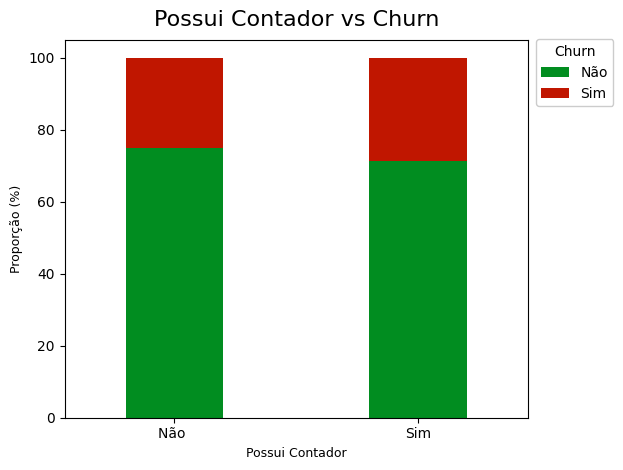

In [201]:
print(f"ANÁLISE: POSSUI CONTADOR vs CHURN")
print("=" * 70)

# Frequência por grupo
crosstab_prop = pd.crosstab(df['PossuiContador'], df['Churn'], normalize='index') * 100
crosstab_prop = crosstab_prop.round(2)
print(crosstab_prop.sort_values('Sim', ascending=False))

# Visualização
plt.figure(figsize=(8, 6))
crosstab_prop.sort_values('Sim').plot(kind='bar', stacked=True, color=["#018d20", "#C01600"], width=0.4)
plt.title('Possui Contador vs Churn', fontsize=16, pad=10)
plt.xlabel('Possui Contador', fontsize= 9)
plt.ylabel('Proporção (%)', fontsize= 9)
plt.legend(title='Churn',
           labels=['Não', 'Sim'],
           loc='upper right',       
           bbox_to_anchor=(1.2, 1.02),
           fancybox=True, 
           shadow=False, 
           framealpha=1)
plt.xticks(rotation=0.001)
plt.tight_layout()

Clientes que possuem Contador (Sim) apresentam uma taxa de Churn de 28.61%.

Clientes que não possuem Contador (Não) apresentam uma taxa de Churn de 25.04%.

A **taxa de Churn é ligeiramente maior** para o grupo que **possui contador**. Isso é um pouco contraintuitivo e sugere que a plataforma pode não estar atendendo bem às necessidades ou exigências específicas trazidas pelo profissional de contabilidade como: integrações, relatórios fiscais, ou complexidade de uso para terceiros.

In [202]:
# Identificando a quantidade de observações nas duas amostras

df['PossuiContador'].value_counts()

PossuiContador
Não     3390
Sim     2971
Name: count, dtype: int64

Como os tamanhos amostrais são superiores a 30 observações em cada grupo, o Teorema do Limite Central é aceito, ou seja, a distribuição dos dados se aproxima de uma normal.

Iremos usar o Teste Z para proporção para duas amostras independentes.

##### Teste utilizado: **Teste Z para duas proporções independentes**

A coluna "PossuiContador" possui dados nulos, pois, como vimos da análise exploratória muitas empresas alegaram não terem *contador*. Entretanto, para o teste de hipótese que queremos realizar, precisamos retirar os dados Nan(nulos) para que o teste ocorra de forma bem sucedida

- H0: As empresas que possuem e não possuem contador tem uma proporção igual de churn.

- HA: As empresas que possuem contador tem uma proporção maior de churn.

Nível de signifância = 0.05(95%)

In [203]:
# Limpeza: remove linhas onde qualquer uma das colunas necessárias seja NaN
# Checagem de valores únicos da coluna

df_limpo = df.dropna(subset=['PossuiContador', 'Churn_bin']).copy()

print(df['PossuiContador'].unique())

[nan 'Não ' 'Sim']


A categoria **Não** tem um espaço a mais, 'Não ', portanto, irei realizar a remoção desse espaço pela método *.strip()* que em suma, realiza a remoção do espaço em branco, ou seja, a padronização dos dados é feita e podemos realizar o nosso teste sem nenhum problema.

In [204]:
# Aplicando o método .strip() para remover espaços antes e depois do texto

df_limpo['PossuiContador'] = df_limpo['PossuiContador'].str.strip()

In [205]:
# Divindo as duas catergorias em duas amostras independentes para realizar o teste

df_contador_sim = df_limpo[df_limpo['PossuiContador'] == 'Sim']
df_contador_nao = df_limpo[df_limpo['PossuiContador'] == 'Não']

In [206]:
from statsmodels.stats.proportion import proportions_ztest

# Teste
successes = [df_contador_sim['Churn_bin'].sum(), df_contador_nao['Churn_bin'].sum()]
nobs = [df_contador_sim['Churn_bin'].count(), df_contador_nao['Churn_bin'].count()]

z_stat, p_value = proportions_ztest(successes, nobs=nobs, alternative='larger') # alternative: define também um teste unilateral (one-tailed) à direita.
print(f'Teste Z: {z_stat:.4f}\nP-value: {p_value}')

Teste Z: 3.2068
P-value: 0.0006711422729556424


In [207]:
# Calculando as taxas (Proporções)
taxa_churn_sim = (successes[0] / nobs[0]) * 100
taxa_churn_nao = (successes[1] / nobs[1]) * 100

# Calculando a diferença absoluta
diff_absoluta = taxa_churn_sim - taxa_churn_nao

print(f"Taxa de Churn (Com Contador): {taxa_churn_sim:.2f}%")
print(f"Taxa de Churn (Sem Contador): {taxa_churn_nao:.2f}%")
print("-" * 40)
print(f"Diferença absoluta: {diff_absoluta:.2f} pontos percentuais")

Taxa de Churn (Com Contador): 28.61%
Taxa de Churn (Sem Contador): 25.04%
----------------------------------------
Diferença absoluta: 3.57 pontos percentuais


Dado o P-value: 0.00067 muito baixo, então rejeitamos a hipótese nula(H0) e afirmamos que existe evidência estatística de que as empresas que possuem contador têm uma proporção (**28.61%**) de Churn significativamente maior do que as que não possuem e a diferença percentual entre os grupos é de **3.57%**.

#### Faz Conciliação Bancária vs Churn

ANÁLISE: FAZ CONCILIAÇÃO BANCARIA vs CHURN
Churn                       Não    Sim
Faz conciliação bancária              
manual                    58.11  41.89
automática                81.04  18.96
não faz                   92.60   7.40


<Figure size 800x600 with 0 Axes>

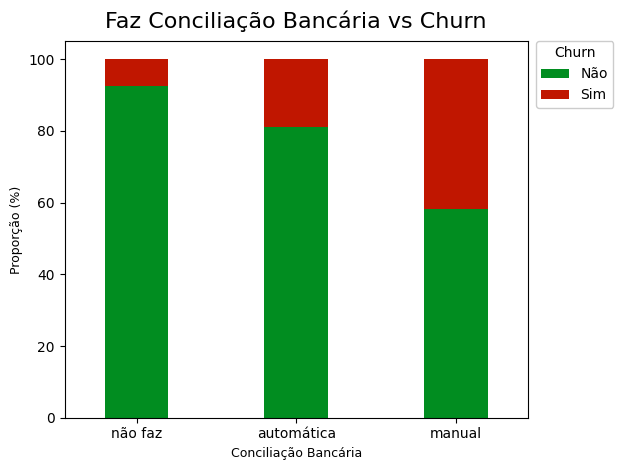

In [208]:
print(f"ANÁLISE: FAZ CONCILIAÇÃO BANCARIA vs CHURN")
print("=" * 70)

# Frequência por grupo
crosstab_prop = pd.crosstab(df['Faz conciliação bancária'], df['Churn'], normalize='index') * 100
crosstab_prop = crosstab_prop.round(2)
print(crosstab_prop.sort_values('Sim', ascending=False))

# Visualização
plt.figure(figsize=(8, 6))
crosstab_prop.sort_values('Sim').plot(kind='bar', stacked=True, color=["#018d20", "#C01600"], width=0.4)
plt.title('Faz Conciliação Bancária vs Churn', fontsize=16, pad=10)
plt.xlabel('Conciliação Bancária', fontsize= 9)
plt.ylabel('Proporção (%)', fontsize= 9)
plt.legend(title='Churn',
           labels=['Não', 'Sim'],
           loc='upper right',       
           bbox_to_anchor=(1.2, 1.02),
           fancybox=True, 
           shadow=False, 
           framealpha=1)
plt.xticks(rotation=0.001)
plt.tight_layout()

De maneira bem expressiva nota-se que a **conciliação bancária realizada manualmente** tem uma porcentagem **superior** as demais com **41,89%** de chances de churn, isso indica, que as empresas deste perfil preferem fazer a gestão de suas finanças e afins relacionados de maneira casual, isto é, podem ser empresas mais novas que se inseriram recentemente no mercado, a empresa pode não ter uma equipe de gestão financeira adequada, o que pode interferir na qualidade da gestão, ou simplesmente, podemos considerar a falta de profissionais que não estão suprindo, ou seja, podem estar sobrecarregados e precisam do auxílio de um novo colega de trabalho.

In [209]:
# Quantidade de observações amostrais

df['Faz conciliação bancária'].value_counts()

Faz conciliação bancária
manual        3096
automática    2421
não faz       1526
Name: count, dtype: int64

##### Teste utilizado: **Teste Chi-Quadrado**

Considerando que a variável 'Faz conciliação bancária' é composta por três categorias distintas, utilizaremos o Teste Qui-Quadrado. O objetivo é verificar se as variações observadas nas taxas de Churn entre esses grupos indicam uma associação estatisticamente significativa.

**Premissas Cumpridas:**
- **Categorização:** Variáveis qualitativas nominais.
- **Independência:** Observações independentes.
- **Volume:** Frequências esperadas > 5 em todas as células (n total = 7043).
- **Representatividade:** Grupos com n > 30, permitindo inferência estatística segura.

**H0**: Não existe associação significativa entre as variáveis.

**HA**: Existe associação significativa entre as variáveis.

In [210]:
from scipy.stats import chi2_contingency

# Criando a tabela de frequências (usando os valores brutos, não os %) 
tabela = pd.crosstab(df_limpo['Faz conciliação bancária'], df_limpo['Churn_bin'])

# Executando o Teste Qui-Quadrado
chi2, p_value, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-value: {p_value}")

Estatística Qui-Quadrado: 745.5624
P-value: 1.2681907025028307e-162


O p-valor mostra-se tão pequeno (1.268e-162) que a chance de essa diferença entre os grupos ser apenas "coincidência" é inexistente. Portanto, H0 é rejeitada e afirmamos a um nível de confiança de 0.05(95%) que existe uma associação significativa entre as variáves, ou seja, as categorias da variável "concilicação bancária" são fortementes ligadas ao churn da empresa.

#### Frequência de utilização de feature do sistema: Integração bancária vs Churn

ANÁLISE: FREQUÊNCIA INTEGRAÇÃO BANCÁRIA VS CHURN
Churn                                                 Não    Sim
Frequência de utilização de feature do sistema:...              
Pouco uso                                           60.87  39.13
Uso frequente                                       77.50  22.50
Nunca utilizou                                      92.60   7.40


<Figure size 800x600 with 0 Axes>

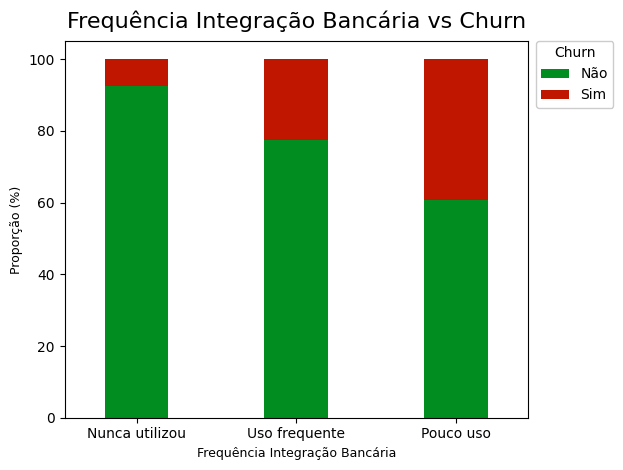

In [211]:
print(f"ANÁLISE: FREQUÊNCIA INTEGRAÇÃO BANCÁRIA VS CHURN")
print("=" * 70)

# Frequência por grupo
crosstab_prop = pd.crosstab(df['Frequência de utilização de feature do sistema: Integração bancária'], df['Churn'], normalize='index') * 100
crosstab_prop = crosstab_prop.round(2)
print(crosstab_prop.sort_values('Sim', ascending=False))

# Visualização
plt.figure(figsize=(8, 6))
crosstab_prop.sort_values('Sim').plot(kind='bar', stacked=True, color=["#018d20", "#C01600"], width=0.4)
plt.title('Frequência Integração Bancária vs Churn', fontsize=16, pad=10)
plt.xlabel('Frequência Integração Bancária', fontsize= 9)
plt.ylabel('Proporção (%)', fontsize= 9)
plt.legend(title='Churn',
           labels=['Não', 'Sim'],
           loc='upper right',       
           bbox_to_anchor=(1.2, 1.02),
           fancybox=True, 
           shadow=False, 
           framealpha=1)
plt.xticks(rotation=0.001)
plt.tight_layout()

Empresas que fazem **Pouco Uso** de integração bancária na plataforma apresentam uma taxa de **39,13%** de churn, nota-se também a diferença do Uso frequente para Pouco uso com uma diferença de 16,63%, isso aponta um dos fatores para que esses cancelamentos estejam ocorrendo com pouco uso.

Empresas assinantes que **utilizam frequentemente** integração bancária, espera-se que possuem **mais administração financeira** como um todo, portanto, uma pesquisa pode estar sendo realizada a essas empresas que estão com 39% de churn para compreender a causa desse comportamento. Uma posterior **ação a ser considerada**, seria o **desenvolvimento de uma campanha de marketing atrativa** para que as empresas com pouco uso, enxerguem os **benefícios de se usar essa integração** na plataforma, tornando o uso mais frequente em suas operação, combatendo o churn.

In [212]:
# Quantidade de observações amostrais

df['Frequência de utilização de feature do sistema: Integração bancária'].value_counts()

Frequência de utilização de feature do sistema: Integração bancária
Pouco uso         3095
Uso frequente     2422
Nunca utilizou    1526
Name: count, dtype: int64

##### Teste utilizado: **Teste Chi-Quadrado**

A variável "Frequência de utilização de feature do sistema: Integração bancária" cumpre com as premissas que levantamos na análise acima, então, o Teste Chi-Quadrado também é aplicado neste caso.

- **H0**: A variável Frequência de Integração Bancária não possui associação para o churn da plataforma.

- **HA**: A variável Frequência de Integração Bancária possui associação signficativa para o churn da plataforma.

In [213]:
from scipy.stats import chi2_contingency

# Criando a tabela de frequências (usando os valores brutos, não os %) 
tabela = pd.crosstab(df_limpo['Frequência de utilização de feature do sistema: Integração bancária'], df_limpo['Churn_bin'])

# Executando o Teste Qui-Quadrado
chi2, p_value, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-value: {p_value}")

Estatística Qui-Quadrado: 551.2146
P-value: 2.0196045985016515e-120


Com o P-valor baixíssimo (2.019e-120), temos uma base estatística de que a diferença observada entre os grupos não é um mero "acaso" e sim fortemente significativa. Com essa evidência a um nível de confiança de 95%, rejeitamos H0 e afirmamos que **a variável Frequência de Integração Bancária possui associação signficativa para o churn da plataforma**.

#### Contrato vs Churn

In [214]:
df['Contrato'].unique()

array(['Mês-a-mês', 'Trimestral', 'Anual'], dtype=object)

ANÁLISE: CONTRATO VS CHURN
Churn         Não    Sim
Contrato                
Mês-a-mês   57.29  42.71
Trimestral  88.73  11.27
Anual       97.17   2.83


<Figure size 800x600 with 0 Axes>

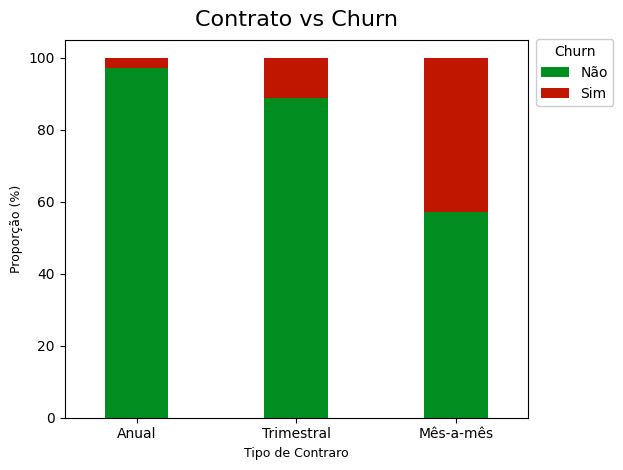

In [215]:
print(f"ANÁLISE: CONTRATO VS CHURN")
print("=" * 70)

# Frequência por grupo
crosstab_prop = pd.crosstab(df['Contrato'], df['Churn'], normalize='index') * 100
crosstab_prop = crosstab_prop.round(2)
print(crosstab_prop.sort_values('Sim', ascending=False))

# Visualização
plt.figure(figsize=(8, 6))
crosstab_prop.sort_values('Sim').plot(kind='bar', stacked=True, color=["#018d20", "#C01600"], width=0.4)
plt.title('Contrato vs Churn', fontsize=16, pad=10)
plt.xlabel('Tipo de Contraro', fontsize= 9)
plt.ylabel('Proporção (%)', fontsize= 9)
plt.legend(title='Churn',
           labels=['Não', 'Sim'],
           loc='upper right',       
           bbox_to_anchor=(1.2, 1.02),
           fancybox=True, 
           shadow=False, 
           framealpha=1)
plt.xticks(rotation=0.001)
plt.tight_layout()

Conforme visualizamos o gráfico e analisamos a frequência da coluna Contrato, claramente vimos que Mês-a-mês é o tipo preferido de contrato das empresas, entretanto, a rotatividade que isso poderia gerar para a plataforma era uma grande dúvida, agora se tornou evidente, conforme vemos no gráfico acima, o tipo **Mês-a-mês** detém **42,71%** de churn, uma **porcentagem expressiva** e **alta**.

Churn por tipo de Contrato              
- **Mês-a-mês:** (Não)57.29% | (Sim)42.71%
- **Trimestral:** (Não)88.73% | (Sim)11.27%
- **Anual:** (Não)97.17% | (Sim)2.83%

Nota-se também que o tipo de contrato Trimestral e progressivamente o Anual, tem chances consideradas mínimas de Churn, portanto, o planejamento de uma estratégia para reter essas empresas mensais e um posterior benefício contratual para fidelizá-los e um suporte ainda mais eficaz, seria o ponto de partida para a fidelização.

In [216]:
# Quantidade de observações amostrais

df['Contrato'].value_counts()

Contrato
Mês-a-mês     3875
Anual         1695
Trimestral    1473
Name: count, dtype: int64

##### Teste utilizado: **Teste Chi-Quadrado**

A variável "Contrato" cumpre com as premissas exijidas para utilizarmos o teste Chi-Quadrado, então vamos lá :D

Definimos as hipóteses para esse teste sendo:

**HO**: Os tipos de contrato não possuem associação signficativa para o churn da plataforma.

**HA**: Os tipos de contrato possui uma associação signficativa para o churn da plataforma.

In [217]:
from scipy.stats import chi2_contingency

# Criando a tabela de frequências (usando os valores brutos, não os %) 
tabela = pd.crosstab(df_limpo['Contrato'], df_limpo['Churn_bin'])

# Executando o Teste Qui-Quadrado
chi2, p_value, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-value: {p_value}")

Estatística Qui-Quadrado: 1071.1183
P-value: 2.5681198382171466e-233


O P-valor obtido foi extremamente baixo (2.568e-233), o que nos permite rejeitar a hipótese nula de forma super convincente, ou seja, a diferença é de longe um "acaso" e sim é estatítiscamente significativa. Portanto rejeitamos H0 e afirmamos que **Os tipos de contrato possui uma associação signficativa para o churn da plataforma.**

#### Receita Mensal vs Churn

In [218]:
df['Receita mensal'].value_counts()

Receita mensal
20.05     61
19.85     45
19.95     44
19.90     44
19.70     43
          ..
38.25      1
110.70     1
114.85     1
68.80      1
28.60      1
Name: count, Length: 1585, dtype: int64

ANÁLISE: RECEITA MENSAL vs CHURN
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
Não    5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Sim    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


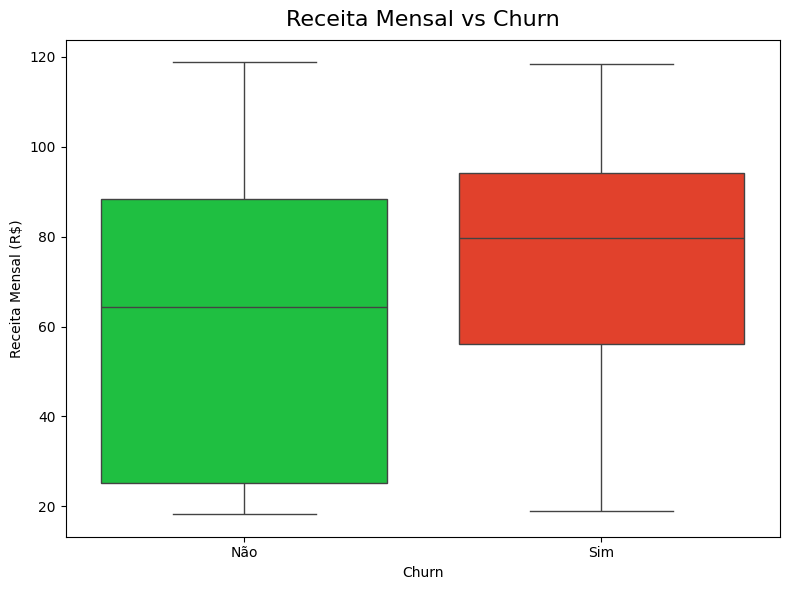

In [219]:
print(f"ANÁLISE: RECEITA MENSAL vs CHURN")
print("=" * 70)

# Estatísticas de resumo por grupo
grouped = df.groupby('Churn')['Receita mensal'].describe()
print(grouped)

# Visualização
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Receita mensal', data=df, hue='Churn', palette=["#04da32", "#ff2a0e"], legend=False)
plt.title('Receita Mensal vs Churn', fontsize= 16, pad= 10)
plt.xlabel('Churn')
plt.ylabel('Receita Mensal (R$)')
plt.tight_layout()
plt.show()

O boxplot revela que as empresas que deram churn resultavam em um valor mensal maior para a empresa, tanto a **média como mediana são maiores no (Sim)** e ambos tem uma maior concentração de valores "menores" a assimetria é negativa.

Observando as estatísticas descritivas temos:

Empresas que deram churn (Sim):
- Média: R$ 74,44
- Mínimo: R$ 18,85
- 1 quartil (25%): R$ 56,15
- Mediana (50%): R$ 79,26
- 3 quartil (75%): R$ 94,2
- Máximo: R$ 118,35

Empresas que não deram churn (Não):
- Média: R$ 61,26
- Mínimo: R$ 18,25
- 1 quartil (25%): R$ 25,10
- Mediana (50%): R$ 64,42
- 3 quartil (75%): R$ 88,4
- Máximo: R$ 118,75

Nítidamente nota-se que as empresas que deram churn geravam uma receita mensal mais alta para a plataforma, do que as que não deram, isso é um fator preocupante e de maneira urgente, deve ser investigado, pois, com certeza impactou no financeiro da plataforma, então, recomendamos que padrões desses cancelamentos sejam buscados para que um trabalho de reversão deste cenário seja feito. Exemplos: melhorias e mais funcionalidades que atendem esse público com o poder de compra e receita maior, ajudando a combater a concorrência, uma pesquisa de mercado também seria uma das opções.

Neste caso, semelhantemente a variável "Fundação da empresa", vamos verificar se as variâncias assumem uma igualdade entre elas, isso é fundamental para a definição do tipo de teste T que usaremos, se a igualdade for assumida, então realizaremos o Teste T-Student para duas amostras independentes, senão assumir variâncias iguais, iremos realizar o Teste T Welch que é semelhante.

Como os tamanhos amostrais são superiores a 30 observações em cada grupo, o Teorema do Limite Central pode ser aplicado, garantindo que a distribuição da proporção amostral seja aproximadamente normal.

In [220]:
df.groupby('Churn')['Receita mensal'].var()

Churn
Não    966.752767
Sim    608.414183
Name: Receita mensal, dtype: float64

Dada as variâncias, iremos realizar um teste F para descobrirmos pelo *p-value* se podemos considerar que as variâncias assumem uma igualdade ou não com um alpha(nível de significância) de 0.05(95%).

Hipótese (Variância):
- H0 = As variâncias são iguais.
- HA = As variâncias são diferentes.

In [221]:
import scipy.stats

# Teste F

receita_mensal_churn = df[df['Churn'] == 'Sim']['Receita mensal']
receita_mensal_nao_churn = df[df['Churn'] == 'Não']['Receita mensal']

df_receita_mensal_churn = len(receita_mensal_churn) - 1 # grau de liberdade da primeira amostra

df_receita_mensal_nao_churn = len(receita_mensal_nao_churn) - 1 # grau de liberdade da segunda amostra

F = receita_mensal_churn.var() / receita_mensal_nao_churn.var() # A maior variância tem que ir no numerador.

alpha = 0.05

1 - scipy.stats.f.cdf(F, df_receita_mensal_churn, df_receita_mensal_nao_churn)

np.float64(1.0)

Após a realização do teste F, o nosso p-valor resultou em (1.0), ou seja, é maior do que o nosso nível de significância de 0.05(95%), portanto, não temos evidências significativas para rejeitar H0, então, as variâncias de ambos os grupos são estatísticamente iguais. Dado que a as variâncias são iguais, podemos por fim, usar o Teste T Student para comparar se a média da receita mensal entre os grupos de Churn é diferente.

##### Teste utilizado: **Teste T (Student) para duas amostras independentes**

O **teste t** será usado neste caso para comparar se as médias da receita mensal entre os grupos de churn é relevante. Na análise multivariada que realizamos, descobrimos que as empresas que deram churn, resultaram em uma maior receita mensal para a empresa, vamos checar se essa descoberta é estatísticamente significativa.

**H0:** A média da receita mensal é menor ou igual entre os grupos de churn.

**HA:** A média da receita mensal é maior entre os grupos de churn.

O Teste é unicaudal a direita a um nível confiança de 0.05

In [222]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(receita_mensal_churn, receita_mensal_nao_churn, equal_var=True, alternative='greater')
print(f'Teste T: {t_stat:.4f}\nP-value: {p_value}')

Teste T: 16.5367
P-value: 1.3533228034442077e-60


Após a resolução do teste o p-valor obtido foi (1.353e-60), um p-valor extretamente baixo, isso significa que a diferença não é apenas um "achado" e sim um evidência estatística significativa. Neste caso, rejeitamos a hipótese nula (H0) e afirmamos a um nível de significância de 95% que **a média da receita mensal do grupo que deu Churn é significativamente maior do que a do grupo que permaneceu**.

#### Receita Total vs Churn

ANÁLISE: RECEITA TOTAL vs CHURN
        count       mean       std    min      25%      50%       75%      max
Churn                                                                         
Não    5163.0  2555.3441  2329.457  18.80  577.825  1683.60  4264.125  8672.45
Sim    1869.0  1531.7961  1890.823  18.85  134.500   703.55  2331.300  8684.80


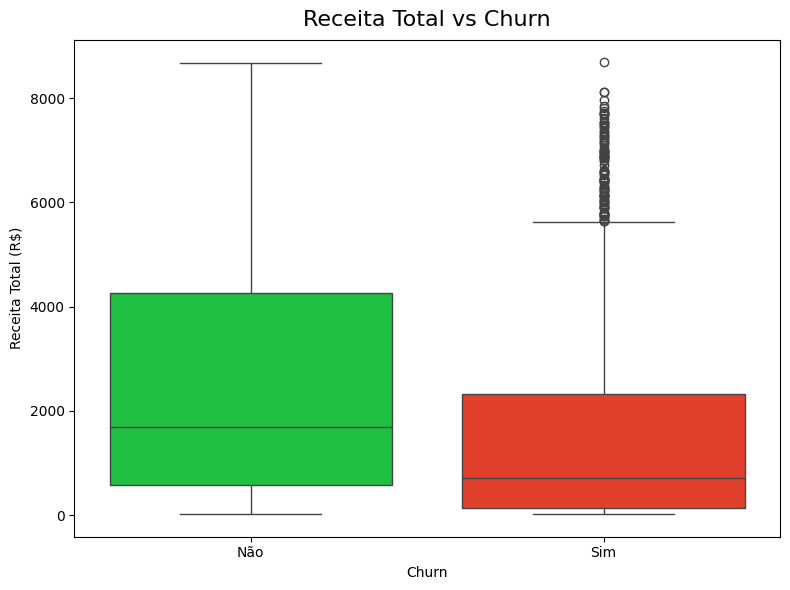

In [223]:
print(f"ANÁLISE: RECEITA TOTAL vs CHURN")
print("=" * 70)

# Estatísticas de resumo por grupo
grouped = df.groupby('Churn')['Receita total'].describe()
print(grouped.round(4))

# Visualização
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Receita total', data=df, hue='Churn', palette=["#04da32", "#ff2a0e"], legend=False)
plt.title('Receita Total vs Churn', fontsize= 16, pad= 10)
plt.xlabel('Churn')
plt.ylabel('Receita Total (R$)')
plt.tight_layout()
plt.show()

Ambos os boxplots apresentam uma assimetria positiva a direita, ou seja, percebemos que o 1 quartil(25%) e a mediana(50% *"2 quartil"*) se concentram em valores menores, ou seja, **75% das empresas tem um valor de receita total abaixo da média**.

Percebemos que os clientes com receitas menores geradas em possíveis períodos curtos de filiação da plataforma, pode ser um dos motivos de churn, entretanto, outliers também são vistos, ou seja, tem empresas valiosas ou empresas de mais tempo na plataforma que podem ter deixado a empresa, essa foi a nossa consideração a respeito dos outliers.

Para escolha do tipo de teste T que iremos utilizar, iremos realizar o teste F para descobrir se as variâncias são iguais ou não, iremos realizar o teste a um nível de significância de 0.05(95%).

Hipótese (Variância):
- H0 = As variâncias são iguais.
- HA = As variâncias são diferentes.

In [224]:
df.groupby('Churn')['Receita total'].var()

Churn
Não    5.426370e+06
Sim    3.575212e+06
Name: Receita total, dtype: float64

In [225]:
import scipy.stats

# Teste F

receita_total_churn = df[df['Churn'] == 'Sim']['Receita total'].dropna()
receita_total_nao_churn = df[df['Churn'] == 'Não']['Receita total'].dropna()

df_receita_total_churn = len(receita_total_churn) - 1 # grau de liberdade da primeira amostra

df_receita_total_nao_churn = len(receita_total_nao_churn) - 1 # grau de liberdade da segunda amostra

F = receita_total_churn.var() / receita_total_nao_churn.var() # A maior variância tem que ir no numerador.

alpha = 0.05

1 - scipy.stats.f.cdf(F, df_receita_total_churn, df_receita_total_nao_churn)

np.float64(1.0)

Após a realização do teste F, o nosso p-valor resultou em (1.0), ou seja, é maior do que o nosso nível de significância de 0.05(95%), portanto, não temos evidências significativas para rejeitar H0, então, as variâncias de ambos os grupos são estatísticamente iguais. Dado que a as variâncias são iguais, podemos por fim, usar o Teste T Student para comparar se a média da receita mensal entre os grupos de Churn é diferente.

##### Teste utilizado: **Teste T (Student) para duas amostras independentes**

**HO:** A média da receita total do grupo Churn (Sim) é **maior ou igual** à média do grupo Não Churn (Não).

**HA:** A média da receita total do grupo Churn (Sim) é **menor** que a média do grupo Não Churn (Não).

Nível de significância: 0.05(95%)

Teste unicaudal a esquerda.

In [226]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(receita_total_churn, receita_total_nao_churn, equal_var=True, alternative='less')
print(f'Teste T: {t_stat:.4f}\nP-value: {p_value}')

Teste T: -17.0688
P-value: 2.4384328448474613e-64


Como o P-valor (2.438e-64) é drasticamente menor que o nível de confiança 0.05, portanto, a hipótese nula é rejeitada e então a envidência estatística que comprova que: **a média da Receita Total dos clientes que deram Churn é significativamente menor**.

## Conclusão

Baseado na pergunta da equipe de negócio se **A taxa de churn (cancelamento de assinaturas) da plataforma está aumentando ?** E nas variáveis que consideramos serem mais impactantes para serem comparadas com a variável Churn, realizamos uma análise multivariada e fizemos testes de hipótese para validar estatísticamente os insights encontrados.

**Significância Estatística**:
- *P-values*: Extremamente Baixos: Em todos os testes realizados (Chi-Quadrado e Teste T), os p-values foram menores que 0,05.

- *Confiança*: Isso significa que temos mais de 95% de confiança (chegando a 99% em vários casos) de que esses padrões existem na realidade e se repetirão no futuro se nada for feito.

Portanto, Afirmamos que os **insights abaixo são estatísticamente significativos** para esta análise.

Consideramos:

- Há evidências estatísticas de que **empresas que churnaram** possuem, em média, um ano de **fundação menor**, indicando que **empresas mais antigas apresentam maior propensão ao churn**.
- Empresas com **até 5 funcionários** tem uma **chance maior de churn**, representando **31.28%**.
- Empresas que utilizam **conciliação bancária** realizada **manualmente** tem uma **porcentagem superior** as demais com **41,89%** de chances de churn.
- Empresas que **fazem Pouco Uso de integração bancária** na plataforma apresentam uma **taxa de 39,13%** de churn.
- Claramente vimos que **Mês-a-mês é o tipo preferido de contrato das empresas**, entretanto, concluimos que as chances de rotativade estar acontecendo por esse tipo de contrato é considerada envidente, pois, o tipo Mês-a-mês **detém 42,71% de churn**, uma porcentagem expressiva e alta.
- As empresas que **deram churn geravam uma Receita Mensal mais alta com a média de R$ 74,44** para a plataforma, do que as que não deram com a média de R$ 61,26.
- A respeito da Receita Total percebemos que as **empresas com receitas menores geradas** em possíveis períodos curtos de filiação da plataforma, é **considerado** um dos **fatores de churn**.

Portanto, como apenas foi nos passado o período de Abril e Maio, concluímos que em Maio de fato, teve um aumento de churn e os fatores prescritos acima são os que estão contribuindo para essa alta de Abril para Maio, por menor que seja.

## Recomendações

Com o **foco** em **retenção** e **crescimento** que determinamos para combater o churn que ocorreram nos meses de Abril e Maio, recomendamos:

**Foco Operacional e de Suporte**
- Auditoria de Churn: Iniciar uma revisão imediata das operações em contas de clientes com alto risco de churn.

- Reforço de Pessoal: Aumentar o quadro de funcionários em Operações/Suporte para otimizar a produção e garantir a fidelização.

**Aperfeiçoamento do Produto**
- Expansão Financeira: Integrar urgentemente novas funcionalidades de conciliação e integração bancária para atender Contabilidade e Setores Financeiros.

- Capacitação Personalizada: Implementar treinamentos e atendimentos personalizados para demonstrar o valor dos novos recursos contábeis/financeiros.

**Estratégia de Receita e Contratos**
- Plano de Migração: Criar um plano de ação para converter contratos mensais para modalidades Trimestrais ou Anuais.

- Pesquisa de Fidelização: Realizar uma pesquisa para definir benefícios contratuais estratégicos e aprimorar o suporte para clientes de longo prazo.

**Inteligência de Mercado**
- Análise de Churn Segmentada: Conduzir pesquisa de mercado para entender o churn de empresas de alto faturamento (que saíram) e de baixo faturamento (com tendência de saída), visando identificar funcionalidades faltantes.